# Use yf data to optimize - it worked better for forcasts real-world out of the box

In [1]:
!pip install datasets
!pip install transformers
!pip install huggingface_hub
!pip install git+https://github.com/huggingface/peft.git
!pip install git+https://github.com/huggingface/accelerate.git
!pip install torch
!pip install googlesearch-python
!pip install GoogleNews
!pip install textblob
!pip install schedule
!pip install time
!pip install telebot
!pip install telethon
!pip install transformers
!pip install vadersentiment
!pip install alpha_vantage
!pip install Prophet
!pip install tensorflow

  Cloning https://github.com/huggingface/peft.git to /private/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/pip-req-build-p4gxggla
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/peft.git /private/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/pip-req-build-p4gxggla
  Resolved https://github.com/huggingface/peft.git to commit e72a96f7cfdb330236c1b6dfe49be398d83f089e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/huggingface/accelerate.git to /private/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/pip-req-build-jyd52_65
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate.git /private/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/pip-req-build-jyd52_65
  Resolved https://github.com/huggingface/accelerate.git to commit 12a007d55937345aa986f5d7b1a1b6f2038465a7
  Installing build dependen

In [5]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 10.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 10.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 11.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 7.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.0/521.0 kB 9.0 MB/s eta 0:00:0000:01
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0.7
    Uninstalling flatbuffers-2.0.7:
      Successfully uninstalled flatbuffers-2.0.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is th

In [18]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.4 MB/s eta 0:00:00


In [6]:
import requests
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import schedule
import time
from transformers import pipeline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from GoogleNews import GoogleNews
import yfinance as yf
import torch
import torch.nn.functional as F
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout

# Initial Test

In [43]:
def get_numeric_data(ticker):
    # Define the ticker symbol and time period
    period = "6mo" #must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']"
    interval = "1h"

    # Retrieve the historical market data
    data = yf.download(tickers=ticker, period=period, interval=interval)

    # Retrieve the ticker info
    ticker_info = yf.Ticker(ticker).info

    # Extract the market cap
    #market_cap = ticker_info['marketCap']

    # Calculate the moving averages
    data['MA_50'] = data['Close'].rolling(window=50).mean()
    data['MA_200'] = data['Close'].rolling(window=200).mean()

    # Calculate the RSI
    delta = data['Close'].diff(1)
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    roll_up = up.rolling(window=14).mean()
    roll_down = down.rolling(window=14).mean().abs()
    RS = roll_up / roll_down
    data['RSI'] = 100.0 - (100.0 / (1.0 + RS))

    # Calculate the MACD
    data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
    data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = data['EMA_12'] - data['EMA_26']
    data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

    # Create a single dataframe called numeric_df
    numeric_df = data.select_dtypes(include=['number'])

    # Reset the index
    numeric_df.reset_index(inplace=True)

    return numeric_df

ticker = 'SPY'
numeric = get_numeric_data(ticker)
numeric.head(10)

[*********************100%%**********************]  1 of 1 completed


,Datetime,Open,High,Low,Close,Adj Close,Volume,MA_50,MA_200,RSI,EMA_12,EMA_26,MACD,Signal
0,2024-01-11 15:30:00-05:00,475.899994,476.700012,475.540009,476.329987,476.329987,0,NaN,NaN,NaN,476.329987,476.329987,0.000000,0.000000
1,2024-01-12 09:30:00-05:00,477.839996,478.600006,475.899994,476.529999,476.529999,14830436,NaN,NaN,NaN,476.360758,476.344802,0.015955,0.003191
2,2024-01-12 10:30:00-05:00,476.519989,476.910095,475.230011,476.579498,476.579498,8085545,NaN,NaN,NaN,476.394410,476.362187,0.032223,0.008997
3,2024-01-12 11:30:00-05:00,476.579987,476.820007,475.364990,475.920013,475.920013,5283510,NaN,NaN,NaN,476.321426,476.329434,-0.008008,0.005596
4,2024-01-12 12:30:00-05:00,475.940002,476.760010,475.609985,476.629913,476.629913,4370521,NaN,NaN,NaN,476.368886,476.351691,0.017194,0.007916
5,2024-01-12 13:30:00-05:00,476.640015,477.339996,476.490112,476.910004,476.910004,5334534,NaN,NaN,NaN,476.452135,476.393048,0.059087,0.018150
6,2024-01-12 14:30:00-05:00,476.909912,476.929993,475.760010,476.189514,476.189514,6290298,NaN,NaN,NaN,476.411731,476.377971,0.033760,0.021272
7,2024-01-12 15:30:00-05:00,476.299286,476.899994,476.079987,476.660004,476.660004,8577369,NaN,NaN,NaN,476.449927,476.398863,0.051065,0.027231
8,2024-01-16 09:30:00-05:00,475.500000,476.260010,473.470001,475.920013,475.920013,14851461,NaN,NaN,NaN,476.368402,476.363392,0.005010,0.022786
9,2024-01-16 10:30:00-05:00,475.920013,476.609802,474.609985,475.880310,475.880310,12233560,NaN,NaN,NaN,476.293311,476.327608,-0.034297,0.011370


[*********************100%%**********************]  1 of 1 completed
13:45:36 - cmdstanpy - INFO - Chain [1] start processing
13:45:37 - cmdstanpy - INFO - Chain [1] done processing
/Users/aidanlew/miniconda3/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/aidanlew/miniconda3/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Future close prices: [559.52101516 559.77538824 560.43421233 560.55534922 560.50359034
 561.75832151 563.55240151 564.33990641 564.5942795  565.25310359
 565.37424048 565.3224816  566.57721277 568.37129277 569.15879767
 569.41317076 570.07199485 570.19313174 570.14137286 571.39610402
 573.19018403 573.97768893 574.23206202 574.89088611 575.012023
 574.96026412 576.21499528 578.00907529 578.79658019 579.05095327]


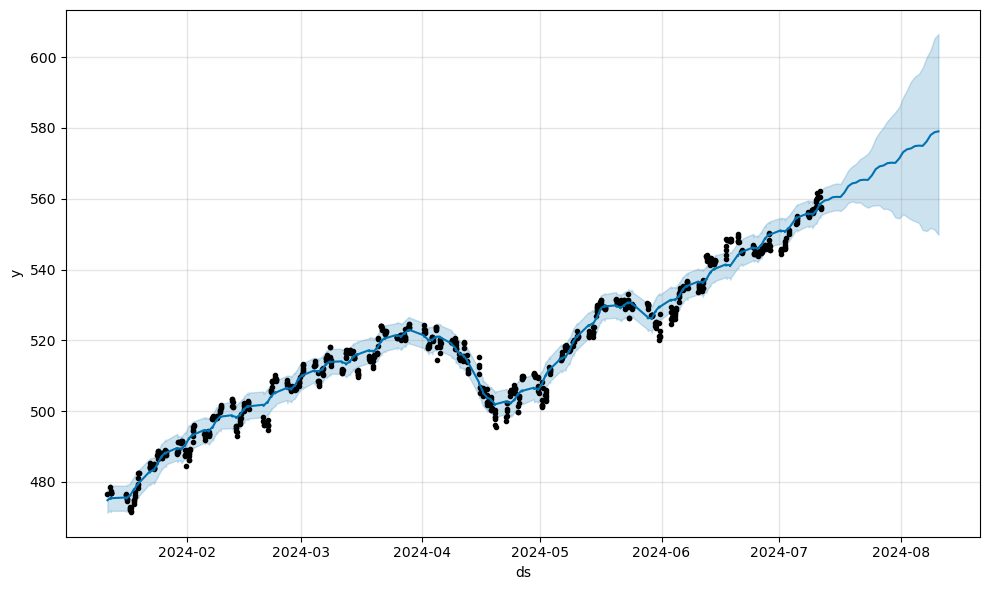

In [45]:
def prophet_forecast(df, future_days):
    # Select only the necessary columns
    df = df[['Datetime', 'High']]

    # Rename the columns to match Prophet's requirements
    df = df.rename(columns={'Datetime': 'ds', 'High': 'y'})

    # Ensure the 'ds' column is of datetime type and remove timezone
    df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)

    # Create a Prophet model
    model = Prophet()

    # Fit the model to the data
    model.fit(df)

    # Make a forecast for the next 'future_days' days
    future = model.make_future_dataframe(periods=future_days)

    # Make predictions on the future dataframe
    forecast = model.predict(future)

    # Extract the forecasted close prices
    future_close_prices = forecast['yhat'].values[-future_days:]
    model.plot(forecast)
    return future_close_prices

ticker = 'SPY'
df = get_numeric_data(ticker)
future_close_prices = prophet_forecast(df, future_days = 30)
print("Future close prices:", future_close_prices)

[*********************100%%**********************]  1 of 1 completed
09:12:47 - cmdstanpy - INFO - Chain [1] start processing
09:12:48 - cmdstanpy - INFO - Chain [1] done processing
/Users/aidanlew/miniconda3/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/aidanlew/miniconda3/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


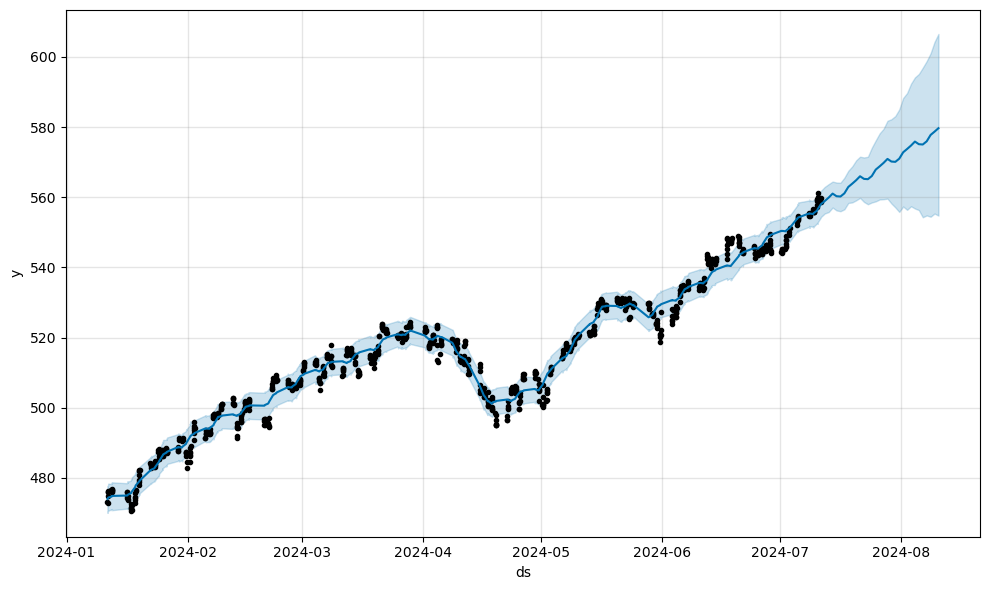

In [16]:
def send_forcast(ticker, prediction):
    BOT_TOKEN = "7026191163:AAE4CiZV_DLachLeHqz4xAVzDDymqOIKz8Y" ######## Token ##########
    chat_id = "7298484676" ######## Token ##########

    message = f"Done trainig {[prediction]}" 

    url = f"https://api.telegram.org/bot{BOT_TOKEN}/sendMessage?chat_id={chat_id}&text={message}"

    requests.get(url).json()

ticker = 'SPY'
df = get_numeric_data(ticker)
prediction = prophet_forecast(df, future_days = 30)
send_forcast('SPY', prediction)

# Optimization

In [20]:
ticker = 'SPY'
df = get_numeric_data(ticker)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Datetime,Open,High,Low,Close,Adj Close,Volume,MA_50,MA_200,RSI
0,2024-01-11 10:30:00-05:00,474.989990,475.570007,472.519989,473.049988,473.049988,0,NaN,NaN,NaN
1,2024-01-11 11:30:00-05:00,473.049988,473.618988,472.260010,472.940002,472.940002,9033453,NaN,NaN,NaN
2,2024-01-11 12:30:00-05:00,472.959991,475.040009,472.959991,474.750000,474.750000,8047199,NaN,NaN,NaN
3,2024-01-11 13:30:00-05:00,474.760010,476.230011,474.610107,476.100006,476.100006,8400846,NaN,NaN,NaN
4,2024-01-11 14:30:00-05:00,476.109985,476.979004,475.464996,475.910004,475.910004,8034505,NaN,NaN,NaN


# 10 iters 

[I 2024-07-11 09:45:47,288] Trial 13 finished with value: 2.4129989057941836 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.044996419255007594, 'seasonality_prior_scale': 9.109944860708282, 'holidays_prior_scale': 1.1030392097857449, 'mcmc_samples': 345, 'interval_width': 0.7744829892750782, 'uncertainty_samples': 500}. Best is trial 8 with value: 2.403434502300844.

In [24]:
import optuna
from prophet import Prophet
from prophet.diagnostics import cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import pandas as pd

#get data
ticker = 'SPY'
df = get_numeric_data(ticker)

# Define the study name and store
study_name = 'prophet_optimization'
study = optuna.create_study(direction='minimize', study_name=study_name, storage='sqlite:///prophet_optimization.db', load_if_exists=True)

# Define the hyperparameter space
def define_hyperparameter_space(trial):
    seasonality_mode = trial.suggest_categorical('seasonality_mode', ['additive', 'multiplicative'])
    changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
    seasonality_prior_scale = trial.suggest_loguniform('seasonality_prior_scale', 1.0, 10.0)
    holidays_prior_scale = trial.suggest_loguniform('holidays_prior_scale', 1.0, 10.0)
    mcmc_samples = trial.suggest_int('mcmc_samples', 100, 500)
    interval_width = trial.suggest_uniform('interval_width', 0.5, 0.95)
    uncertainty_samples = trial.suggest_int('uncertainty_samples', 100, 500)
    return {
        'seasonality_mode': seasonality_mode,
        'changepoint_prior_scale': changepoint_prior_scale,
        'seasonality_prior_scale': seasonality_prior_scale,
        'holidays_prior_scale': holidays_prior_scale,
        'mcmc_samples': mcmc_samples,
        'interval_width': interval_width,
        'uncertainty_samples': uncertainty_samples
    }

# Optuna optimization
def objective(trial):
    hyperparams = define_hyperparameter_space(trial)
    model = Prophet(**hyperparams)
    
    # Prepare the data
    df_selected = df
    
    # Rename the columns to match Prophet's requirements
    df_selected = df.rename(columns={'Datetime': 'ds', 'Close': 'y'})

    # Ensure the 'ds' column is of datetime type and remove timezone
    df_selected['ds'] = pd.to_datetime(df_selected['ds']).dt.tz_localize(None)

    # Fit the model and evaluate the metric
    model.fit(df_selected)
    
    #initial = how much to be trained on, period = when to retrain, horizon = test days for cross validation
    df_cv = cross_validation(model, initial='120 days', period='60 days', horizon='15 days')
    score = mean_absolute_error(df_cv['y'], df_cv['yhat'])  # Use MAE as the score

    return score

# Run the optimization
study.optimize(objective, n_trials=10
              )

# Save the study
#study.save()

# Get the best trial and print the results
best_trial = study.best_trial
print("Best hyperparameters:", best_trial.params)
print("Best score:", best_trial.value)

def send_notification():
    BOT_TOKEN = "7026191163:AAE4CiZV_DLachLeHqz4xAVzDDymqOIKz8Y" ######## Token ##########
    chat_id = "7298484676" ######## Token ##########

    message = f"Done trainig {study.best_params} {best_trial.value}" 

    url = f"https://api.telegram.org/bot{BOT_TOKEN}/sendMessage?chat_id={chat_id}&text={message}"

    requests.get(url).json()

send_notification()

[*********************100%%**********************]  1 of 1 completed
[I 2024-07-11 09:28:35,036] Using an existing study with name 'prophet_optimization' instead of creating a new one.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/1226395046.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/1226395046.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  seasonality_prior_scale = trial.suggest_loguniform('seasonality_prior_scale', 1.0, 10.0)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:29:36 - cmdstanpy - INFO - CmdStan done processing.
09:29:36 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

09:29:37 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:30:51 - cmdstanpy - INFO - CmdStan done processing.
09:30:51 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 09:30:52,581] Trial 4 finished with value: 14.805732565135491 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.01560556410769722, 'seasonality_prior_scale': 4.150396096937804, 'holidays_prior_scale': 1.6708906293892722, 'mcmc_samples': 383, 'interval_width': 0.6306904086459314, 'uncertainty_samples': 286}. Best is trial 3 with value: 12.855015783570934.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/1226395046.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/1226395046.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:31:40 - cmdstanpy - INFO - CmdStan done processing.
09:31:40 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

09:31:40 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:32:24 - cmdstanpy - INFO - CmdStan done processing.
09:32:24 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 09:32:24,914] Trial 5 finished with value: 11.130025607858597 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.13657614341534646, 'seasonality_prior_scale': 1.2485629368069537, 'holidays_prior_scale': 2.71215456214746, 'mcmc_samples': 228, 'interval_width': 0.5740937725544967, 'uncertainty_samples': 445}. Best is trial 5 with value: 11.130025607858597.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/1226395046.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/1226395046.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/o

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:33:19 - cmdstanpy - INFO - CmdStan done processing.
09:33:19 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

09:33:20 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:34:05 - cmdstanpy - INFO - CmdStan done processing.
09:34:05 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 09:34:06,513] Trial 6 finished with value: 2.4474164543545074 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03393492546044381, 'seasonality_prior_scale': 2.8191227719535004, 'holidays_prior_scale': 1.4173845975658126, 'mcmc_samples': 288, 'interval_width': 0.6456738746356987, 'uncertainty_samples': 372}. Best is trial 6 with value: 2.4474164543545074.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/1226395046.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/1226395046.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optun

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:34:35 - cmdstanpy - INFO - CmdStan done processing.
09:34:35 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

09:34:35 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:34:59 - cmdstanpy - INFO - CmdStan done processing.
09:34:59 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 09:35:00,432] Trial 7 finished with value: 6.6404269563765 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.013564560864783474, 'seasonality_prior_scale': 4.234391782714566, 'holidays_prior_scale': 1.760336218089978, 'mcmc_samples': 194, 'interval_width': 0.8897172622908629, 'uncertainty_samples': 149}. Best is trial 6 with value: 2.4474164543545074.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/1226395046.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/1226395046.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/opt

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:35:53 - cmdstanpy - INFO - CmdStan done processing.
09:35:53 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

09:35:53 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:36:42 - cmdstanpy - INFO - CmdStan done processing.
09:36:42 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, c

[I 2024-07-11 09:36:43,546] Trial 8 finished with value: 2.403434502300844 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.07356779618460811, 'seasonality_prior_scale': 4.398310804614759, 'holidays_prior_scale': 1.4552861156864108, 'mcmc_samples': 320, 'interval_width': 0.5811674909825721, 'uncertainty_samples': 424}. Best is trial 8 with value: 2.403434502300844.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/1226395046.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/1226395046.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:37:17 - cmdstanpy - INFO - CmdStan done processing.
09:37:17 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

09:37:18 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:37:48 - cmdstanpy - INFO - CmdStan done processing.
09:37:48 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 09:37:49,477] Trial 9 finished with value: 5.311776887147595 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.37053734359339874, 'seasonality_prior_scale': 3.6807919070380466, 'holidays_prior_scale': 6.290980225062681, 'mcmc_samples': 210, 'interval_width': 0.7578686597208999, 'uncertainty_samples': 188}. Best is trial 8 with value: 2.403434502300844.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/1226395046.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/1226395046.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/op

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:39:08 - cmdstanpy - INFO - CmdStan done processing.
09:39:08 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

09:39:08 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:40:22 - cmdstanpy - INFO - CmdStan done processing.
09:40:22 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 09:40:23,060] Trial 10 finished with value: 2.696567238741099 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.011725554326112955, 'seasonality_prior_scale': 1.4635521256585178, 'holidays_prior_scale': 9.676488054376438, 'mcmc_samples': 463, 'interval_width': 0.516339206830802, 'uncertainty_samples': 398}. Best is trial 8 with value: 2.403434502300844.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/1226395046.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/1226395046.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:41:39 - cmdstanpy - INFO - CmdStan done processing.
09:41:39 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

09:41:39 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:42:50 - cmdstanpy - INFO - CmdStan done processing.
09:42:50 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 09:42:51,752] Trial 11 finished with value: 23.559321779064206 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.10398749469967067, 'seasonality_prior_scale': 2.6016787416744864, 'holidays_prior_scale': 8.187315433384521, 'mcmc_samples': 453, 'interval_width': 0.6814443052626917, 'uncertainty_samples': 237}. Best is trial 8 with value: 2.403434502300844.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/1226395046.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/1226395046.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:43:24 - cmdstanpy - INFO - CmdStan done processing.
09:43:24 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

09:43:24 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:43:53 - cmdstanpy - INFO - CmdStan done processing.
09:43:53 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 09:43:53,861] Trial 12 finished with value: 5.542394804314071 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.10060556906128755, 'seasonality_prior_scale': 5.158212496948726, 'holidays_prior_scale': 7.28962873398934, 'mcmc_samples': 202, 'interval_width': 0.5696993976631194, 'uncertainty_samples': 153}. Best is trial 8 with value: 2.403434502300844.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/1226395046.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/1226395046.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/opt

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:44:52 - cmdstanpy - INFO - CmdStan done processing.
09:44:52 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

09:44:52 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:45:46 - cmdstanpy - INFO - CmdStan done processing.
09:45:46 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 09:45:47,288] Trial 13 finished with value: 2.4129989057941836 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.044996419255007594, 'seasonality_prior_scale': 9.109944860708282, 'holidays_prior_scale': 1.1030392097857449, 'mcmc_samples': 345, 'interval_width': 0.7744829892750782, 'uncertainty_samples': 500}. Best is trial 8 with value: 2.403434502300844.


Best hyperparameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.07356779618460811, 'seasonality_prior_scale': 4.398310804614759, 'holidays_prior_scale': 1.4552861156864108, 'mcmc_samples': 320, 'interval_width': 0.5811674909825721, 'uncertainty_samples': 424}
Best score: 2.403434502300844


# Test Optimization 10 iters

[*********************100%%**********************]  1 of 1 completed
13:18:19 - cmdstanpy - INFO - Chain [1] start processing
13:18:19 - cmdstanpy - INFO - Chain [1] done processing
/Users/aidanlew/miniconda3/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/aidanlew/miniconda3/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Future close prices: [558.77590132 559.977567   560.72789916 559.86321556 559.92539667
 560.9963359  562.79024217 563.57617805 564.77784373 565.5281759
 564.66349229 564.72567341 565.79661263 567.5905189  568.37645479
 569.57812047 570.32845263 569.46376903 569.52595014 570.59688937
 572.39079564 573.17673152 574.3783972  575.12872936 574.26404576
 574.32622688 575.3971661  577.19107237 577.97700826 579.17867394]


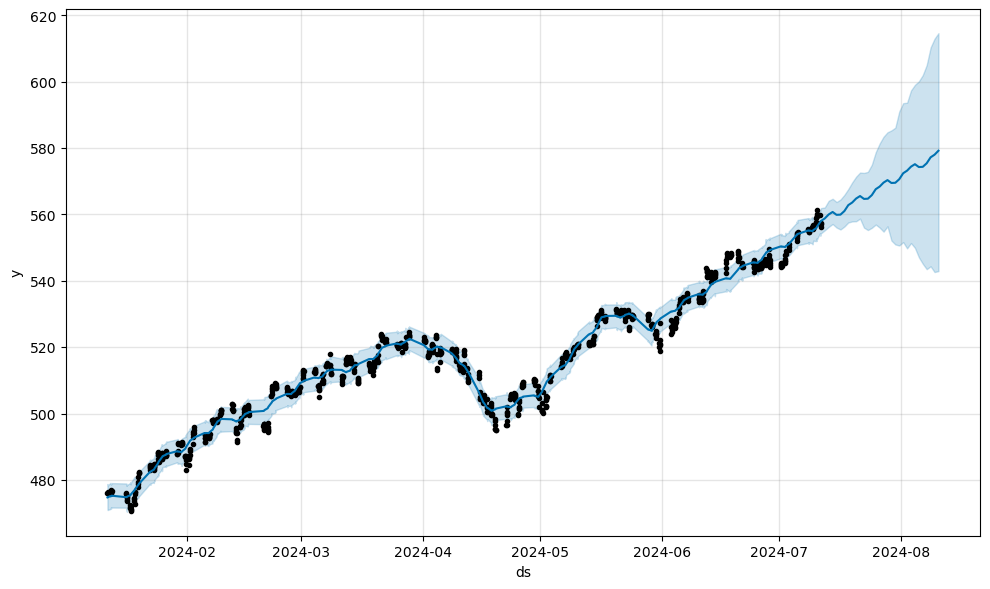

In [37]:
def prophet_forecast(df, future_days):
    # Select only the necessary columns
    df = df[['Datetime', 'Close']]

    # Rename the columns to match Prophet's requirements
    df = df.rename(columns={'Datetime': 'ds', 'Close': 'y'})

    # Ensure the 'ds' column is of datetime type and remove timezone
    df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)

    params = {'seasonality_mode': 'additive',
              'changepoint_prior_scale': 0.07356779618460811,
              'seasonality_prior_scale': 4.398310804614759,
              'holidays_prior_scale': 1.4552861156864108,
              'uncertainty_samples': 424}
    
    # Create a Prophet model
    model = Prophet(**params)

    # Fit the model to the data
    model.fit(df)

    # Make a forecast for the next 'future_days' days
    future = model.make_future_dataframe(periods=future_days)

    # Make predictions on the future dataframe
    forecast = model.predict(future)

    # Extract the forecasted close prices
    future_close_prices = forecast['yhat'].values[-future_days:]
    model.plot(forecast)
    return future_close_prices

ticker = 'SPY'
df = get_numeric_data(ticker)
future_close_prices = prophet_forecast(df, future_days = 30)
print("Future close prices:", future_close_prices)



# 100 iters

In [25]:
import optuna
from prophet import Prophet
from prophet.diagnostics import cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import pandas as pd

#get data
ticker = 'SPY'
df = get_numeric_data(ticker)

# Define the study name and store
study_name = 'prophet_optimization'
study = optuna.create_study(direction='minimize', study_name=study_name, storage='sqlite:///prophet_optimization.db', load_if_exists=True)

# Define the hyperparameter space
def define_hyperparameter_space(trial):
    seasonality_mode = trial.suggest_categorical('seasonality_mode', ['additive', 'multiplicative'])
    changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
    seasonality_prior_scale = trial.suggest_loguniform('seasonality_prior_scale', 1.0, 10.0)
    holidays_prior_scale = trial.suggest_loguniform('holidays_prior_scale', 1.0, 10.0)
    mcmc_samples = trial.suggest_int('mcmc_samples', 100, 500)
    interval_width = trial.suggest_uniform('interval_width', 0.5, 0.95)
    uncertainty_samples = trial.suggest_int('uncertainty_samples', 100, 500)
    return {
        'seasonality_mode': seasonality_mode,
        'changepoint_prior_scale': changepoint_prior_scale,
        'seasonality_prior_scale': seasonality_prior_scale,
        'holidays_prior_scale': holidays_prior_scale,
        'mcmc_samples': mcmc_samples,
        'interval_width': interval_width,
        'uncertainty_samples': uncertainty_samples
    }

# Optuna optimization
def objective(trial):
    hyperparams = define_hyperparameter_space(trial)
    model = Prophet(**hyperparams)
    
    # Prepare the data
    df_selected = df
    
    # Rename the columns to match Prophet's requirements
    df_selected = df.rename(columns={'Datetime': 'ds', 'Close': 'y'})

    # Ensure the 'ds' column is of datetime type and remove timezone
    df_selected['ds'] = pd.to_datetime(df_selected['ds']).dt.tz_localize(None)

    # Fit the model and evaluate the metric
    model.fit(df_selected)
    
    #initial = how much to be trained on, period = when to retrain, horizon = test days for cross validation
    df_cv = cross_validation(model, initial='120 days', period='60 days', horizon='15 days')
    score = mean_absolute_error(df_cv['y'], df_cv['yhat'])  # Use MAE as the score

    return score

# Run the optimization
study.optimize(objective, n_trials=100
              )

# Save the study
#study.save()

# Get the best trial and print the results
best_trial = study.best_trial
print("Best hyperparameters:", best_trial.params)
print("Best score:", best_trial.value)

def send_notification():
    BOT_TOKEN = "7026191163:AAE4CiZV_DLachLeHqz4xAVzDDymqOIKz8Y" ######## Token ##########
    chat_id = "7298484676" ######## Token ##########

    message = f"Done trainig {study.best_params} {best_trial.value}" 

    url = f"https://api.telegram.org/bot{BOT_TOKEN}/sendMessage?chat_id={chat_id}&text={message}"

    requests.get(url).json()

send_notification()

[*********************100%%**********************]  1 of 1 completed
[I 2024-07-11 10:14:03,670] Using an existing study with name 'prophet_optimization' instead of creating a new one.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  seasonality_prior_scale = trial.suggest_loguniform('seasonality_prior_scale', 1.0, 10.0)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_97

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:15:06 - cmdstanpy - INFO - CmdStan done processing.
10:15:06 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:15:06 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:16:01 - cmdstanpy - INFO - CmdStan done processing.
10:16:01 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:16:02,283] Trial 14 finished with value: 2.409024628838844 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.04710010167961931, 'seasonality_prior_scale': 9.351410539012845, 'holidays_prior_scale': 1.023338231831255, 'mcmc_samples': 354, 'interval_width': 0.7776416841937124, 'uncertainty_samples': 469}. Best is trial 8 with value: 2.403434502300844.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rel

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:17:04 - cmdstanpy - INFO - CmdStan done processing.
10:17:04 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:17:04 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:18:02 - cmdstanpy - INFO - CmdStan done processing.
10:18:02 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:18:03,361] Trial 15 finished with value: 2.4232078040472618 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.04409275023839909, 'seasonality_prior_scale': 9.956902403559942, 'holidays_prior_scale': 2.5415404348959068, 'mcmc_samples': 377, 'interval_width': 0.8143732005089757, 'uncertainty_samples': 358}. Best is trial 8 with value: 2.403434502300844.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:18:53 - cmdstanpy - INFO - CmdStan done processing.
10:18:53 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, c

  0%|          | 0/1 [00:00<?, ?it/s]

10:18:54 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:19:41 - cmdstanpy - INFO - CmdStan done processing.
10:19:41 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, c

[I 2024-07-11 10:19:41,936] Trial 16 finished with value: 2.5096084639849634 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.02652814619566043, 'seasonality_prior_scale': 6.8507471503438415, 'holidays_prior_scale': 1.0171516639623093, 'mcmc_samples': 302, 'interval_width': 0.9460786310618036, 'uncertainty_samples': 499}. Best is trial 8 with value: 2.403434502300844.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:20:29 - cmdstanpy - INFO - CmdStan done processing.
10:20:29 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:20:29 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:21:14 - cmdstanpy - INFO - CmdStan done processing.
10:21:14 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:21:14,757] Trial 17 finished with value: 2.396278073951497 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.06302377313260296, 'seasonality_prior_scale': 2.11025747636102, 'holidays_prior_scale': 1.339322384407164, 'mcmc_samples': 285, 'interval_width': 0.7081386829318933, 'uncertainty_samples': 319}. Best is trial 17 with value: 2.396278073951497.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rel

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:22:02 - cmdstanpy - INFO - CmdStan done processing.
10:22:02 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, c

  0%|          | 0/1 [00:00<?, ?it/s]

10:22:03 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:22:47 - cmdstanpy - INFO - CmdStan done processing.
10:22:47 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:22:48,352] Trial 18 finished with value: 2.3959629065997325 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.07244353258393474, 'seasonality_prior_scale': 1.9558101220815658, 'holidays_prior_scale': 2.0542899554849305, 'mcmc_samples': 284, 'interval_width': 0.6990489803052126, 'uncertainty_samples': 313}. Best is trial 18 with value: 2.3959629065997325.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optun

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:23:34 - cmdstanpy - INFO - CmdStan done processing.
10:23:34 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:23:34 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:24:15 - cmdstanpy - INFO - CmdStan done processing.
10:24:15 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:24:16,300] Trial 19 finished with value: 2.382945520141994 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.19490304411014667, 'seasonality_prior_scale': 1.9479206481290314, 'holidays_prior_scale': 4.379352243890387, 'mcmc_samples': 270, 'interval_width': 0.7164752635568036, 'uncertainty_samples': 311}. Best is trial 19 with value: 2.382945520141994.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:24:59 - cmdstanpy - INFO - CmdStan done processing.
10:24:59 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:24:59 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:25:37 - cmdstanpy - INFO - CmdStan done processing.
10:25:37 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:25:38,134] Trial 20 finished with value: 2.3798050354647438 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.4943451355707105, 'seasonality_prior_scale': 1.737586765178561, 'holidays_prior_scale': 4.539878377315229, 'mcmc_samples': 253, 'interval_width': 0.6780182717216681, 'uncertainty_samples': 275}. Best is trial 20 with value: 2.3798050354647438.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:25:50 - cmdstanpy - INFO - CmdStan done processing.
10:25:50 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, c

  0%|          | 0/1 [00:00<?, ?it/s]

10:25:51 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:26:04 - cmdstanpy - INFO - CmdStan done processing.
10:26:04 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:26:05,021] Trial 21 finished with value: 2.3868832021733133 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.49040148195578115, 'seasonality_prior_scale': 1.0009635393979632, 'holidays_prior_scale': 4.552707134777652, 'mcmc_samples': 105, 'interval_width': 0.6446104077570222, 'uncertainty_samples': 248}. Best is trial 20 with value: 2.3798050354647438.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:26:43 - cmdstanpy - INFO - CmdStan done processing.
10:26:43 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, c

  0%|          | 0/1 [00:00<?, ?it/s]

10:26:43 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:27:19 - cmdstanpy - INFO - CmdStan done processing.
10:27:19 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:27:19,513] Trial 22 finished with value: 2.376560751514129 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2698439348752167, 'seasonality_prior_scale': 1.6965393435195304, 'holidays_prior_scale': 4.78740605516046, 'mcmc_samples': 235, 'interval_width': 0.8096397900316938, 'uncertainty_samples': 245}. Best is trial 22 with value: 2.376560751514129.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rel

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:27:46 - cmdstanpy - INFO - CmdStan done processing.
10:27:46 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, c

  0%|          | 0/1 [00:00<?, ?it/s]

10:27:46 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:28:11 - cmdstanpy - INFO - CmdStan done processing.
10:28:11 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:28:11,864] Trial 23 finished with value: 2.3744091684488198 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2908087419733707, 'seasonality_prior_scale': 1.4776275615636292, 'holidays_prior_scale': 5.254825318619743, 'mcmc_samples': 170, 'interval_width': 0.850679615208808, 'uncertainty_samples': 106}. Best is trial 23 with value: 2.3744091684488198.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:28:36 - cmdstanpy - INFO - CmdStan done processing.
10:28:36 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:28:36 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:29:00 - cmdstanpy - INFO - CmdStan done processing.
10:29:00 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, c

[I 2024-07-11 10:29:00,633] Trial 24 finished with value: 2.385053452296726 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.3186670984535918, 'seasonality_prior_scale': 1.4751864636318242, 'holidays_prior_scale': 5.505531529343131, 'mcmc_samples': 163, 'interval_width': 0.8367270877935327, 'uncertainty_samples': 219}. Best is trial 23 with value: 2.3744091684488198.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:29:40 - cmdstanpy - INFO - CmdStan done processing.
10:29:40 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:29:40 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:30:17 - cmdstanpy - INFO - CmdStan done processing.
10:30:17 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:30:17,855] Trial 25 finished with value: 2.3737244682738976 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2588128285830926, 'seasonality_prior_scale': 1.5981299439711922, 'holidays_prior_scale': 3.6119118947828657, 'mcmc_samples': 245, 'interval_width': 0.8256870790819706, 'uncertainty_samples': 114}. Best is trial 25 with value: 2.3737244682738976.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:30:42 - cmdstanpy - INFO - CmdStan done processing.
10:30:42 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:30:42 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:31:06 - cmdstanpy - INFO - CmdStan done processing.
10:31:06 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:31:06,470] Trial 26 finished with value: 2.3759935601653375 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.23620567400633657, 'seasonality_prior_scale': 1.0730791416345014, 'holidays_prior_scale': 3.6990063239091415, 'mcmc_samples': 165, 'interval_width': 0.8446836557603008, 'uncertainty_samples': 117}. Best is trial 25 with value: 2.3737244682738976.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optun

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:31:31 - cmdstanpy - INFO - CmdStan done processing.
10:31:31 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:31:31 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:31:54 - cmdstanpy - INFO - CmdStan done processing.
10:31:54 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:31:54,933] Trial 27 finished with value: 2.383019374255825 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.18751718081512725, 'seasonality_prior_scale': 1.0052915200170238, 'holidays_prior_scale': 3.5062238148271208, 'mcmc_samples': 163, 'interval_width': 0.8689668645667353, 'uncertainty_samples': 124}. Best is trial 25 with value: 2.3737244682738976.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:32:20 - cmdstanpy - INFO - CmdStan done processing.
10:32:20 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:32:20 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:32:44 - cmdstanpy - INFO - CmdStan done processing.
10:32:44 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:32:44,510] Trial 28 finished with value: 2.3741384488436563 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2690494296596377, 'seasonality_prior_scale': 1.2555928267474328, 'holidays_prior_scale': 2.9662473808977996, 'mcmc_samples': 166, 'interval_width': 0.9491128083036316, 'uncertainty_samples': 103}. Best is trial 25 with value: 2.3737244682738976.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:32:56 - cmdstanpy - INFO - CmdStan done processing.
10:32:56 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:32:56 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:33:04 - cmdstanpy - INFO - CmdStan done processing.
10:33:04 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:33:05,150] Trial 29 finished with value: 2.3810867095518304 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.1395170444466207, 'seasonality_prior_scale': 2.3934990556459796, 'holidays_prior_scale': 2.644864947273257, 'mcmc_samples': 101, 'interval_width': 0.9482237037586985, 'uncertainty_samples': 100}. Best is trial 25 with value: 2.3737244682738976.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:33:26 - cmdstanpy - INFO - CmdStan done processing.
10:33:26 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:33:26 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:33:46 - cmdstanpy - INFO - CmdStan done processing.
10:33:46 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:33:47,048] Trial 30 finished with value: 2.3769372444124244 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.3581280154374799, 'seasonality_prior_scale': 1.3772816367331857, 'holidays_prior_scale': 2.174004782823281, 'mcmc_samples': 142, 'interval_width': 0.901730820348864, 'uncertainty_samples': 192}. Best is trial 25 with value: 2.3737244682738976.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:34:15 - cmdstanpy - INFO - CmdStan done processing.
10:34:15 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:34:15 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:34:42 - cmdstanpy - INFO - CmdStan done processing.
10:34:42 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:34:42,424] Trial 31 finished with value: 2.375891565548419 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.1286764948966641, 'seasonality_prior_scale': 1.2118062250220965, 'holidays_prior_scale': 3.1152555858239683, 'mcmc_samples': 181, 'interval_width': 0.9105891639368212, 'uncertainty_samples': 151}. Best is trial 25 with value: 2.3737244682738976.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:35:21 - cmdstanpy - INFO - CmdStan done processing.
10:35:21 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:35:22 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:35:58 - cmdstanpy - INFO - CmdStan done processing.
10:35:58 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:35:59,417] Trial 32 finished with value: 2.3730810778554674 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.1809327656621849, 'seasonality_prior_scale': 1.6592494002898275, 'holidays_prior_scale': 3.7668429614641346, 'mcmc_samples': 240, 'interval_width': 0.9244831333506622, 'uncertainty_samples': 171}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:36:18 - cmdstanpy - INFO - CmdStan done processing.
10:36:18 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:36:18 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:36:35 - cmdstanpy - INFO - CmdStan done processing.
10:36:35 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:36:36,017] Trial 33 finished with value: 2.3816854485422967 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.16714200056883904, 'seasonality_prior_scale': 3.1303285265998895, 'holidays_prior_scale': 3.7294854539212157, 'mcmc_samples': 130, 'interval_width': 0.9233511455448862, 'uncertainty_samples': 179}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optun

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:37:14 - cmdstanpy - INFO - CmdStan done processing.
10:37:14 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:37:14 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:37:48 - cmdstanpy - INFO - CmdStan done processing.
10:37:48 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:37:49,409] Trial 34 finished with value: 2.3751990386895865 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.26427821853663763, 'seasonality_prior_scale': 1.5819753382123258, 'holidays_prior_scale': 3.140359729492484, 'mcmc_samples': 228, 'interval_width': 0.8692870586075389, 'uncertainty_samples': 100}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:38:31 - cmdstanpy - INFO - CmdStan done processing.
10:38:31 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:38:31 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:39:09 - cmdstanpy - INFO - CmdStan done processing.
10:39:09 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:39:10,336] Trial 35 finished with value: 2.3801931137165573 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.23397863822563708, 'seasonality_prior_scale': 1.2841081538899013, 'holidays_prior_scale': 5.744348531324367, 'mcmc_samples': 254, 'interval_width': 0.920650409147846, 'uncertainty_samples': 128}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:39:31 - cmdstanpy - INFO - CmdStan done processing.
10:39:31 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:39:31 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:39:51 - cmdstanpy - INFO - CmdStan done processing.
10:39:51 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:39:51,746] Trial 36 finished with value: 2.3857816520415733 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.3785899937413554, 'seasonality_prior_scale': 2.1857088253005164, 'holidays_prior_scale': 3.5033782879573003, 'mcmc_samples': 138, 'interval_width': 0.8526224153503806, 'uncertainty_samples': 167}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:40:26 - cmdstanpy - INFO - CmdStan done processing.
10:40:26 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, c

  0%|          | 0/1 [00:00<?, ?it/s]

10:40:26 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:40:57 - cmdstanpy - INFO - CmdStan done processing.
10:40:57 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:40:57,843] Trial 37 finished with value: 11.970510165496679 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.29787038037088903, 'seasonality_prior_scale': 1.161158544001416, 'holidays_prior_scale': 4.109262047557515, 'mcmc_samples': 217, 'interval_width': 0.8159606557908918, 'uncertainty_samples': 133}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/o

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:41:27 - cmdstanpy - INFO - CmdStan done processing.
10:41:27 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:41:27 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:41:54 - cmdstanpy - INFO - CmdStan done processing.
10:41:54 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:41:55,015] Trial 38 finished with value: 2.3786668440679968 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.15577773989290136, 'seasonality_prior_scale': 1.772241746048729, 'holidays_prior_scale': 2.8044949566332904, 'mcmc_samples': 186, 'interval_width': 0.8885464450779711, 'uncertainty_samples': 204}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:42:36 - cmdstanpy - INFO - CmdStan done processing.
10:42:36 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:42:36 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:43:15 - cmdstanpy - INFO - CmdStan done processing.
10:43:15 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:43:15,866] Trial 39 finished with value: 5.559371305985676 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.10828632479018337, 'seasonality_prior_scale': 1.3658566422056415, 'holidays_prior_scale': 5.156634059703838, 'mcmc_samples': 256, 'interval_width': 0.9286013129988309, 'uncertainty_samples': 155}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/o

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:44:05 - cmdstanpy - INFO - CmdStan done processing.
10:44:05 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:44:06 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:44:53 - cmdstanpy - INFO - CmdStan done processing.
10:44:53 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, c

[I 2024-07-11 10:44:54,169] Trial 40 finished with value: 2.3790376170543075 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.20996453302152635, 'seasonality_prior_scale': 1.1482594412029874, 'holidays_prior_scale': 2.3062988413416043, 'mcmc_samples': 313, 'interval_width': 0.8852811376411859, 'uncertainty_samples': 102}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optun

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:45:31 - cmdstanpy - INFO - CmdStan done processing.
10:45:31 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:45:32 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:46:07 - cmdstanpy - INFO - CmdStan done processing.
10:46:07 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, c

[I 2024-07-11 10:46:08,007] Trial 41 finished with value: 2.375245654009453 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.4247107814736244, 'seasonality_prior_scale': 1.581836411961986, 'holidays_prior_scale': 6.391687416708663, 'mcmc_samples': 234, 'interval_width': 0.8003825272228071, 'uncertainty_samples': 135}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:46:38 - cmdstanpy - INFO - CmdStan done processing.
10:46:38 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, c

  0%|          | 0/1 [00:00<?, ?it/s]

10:46:38 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:47:06 - cmdstanpy - INFO - CmdStan done processing.
10:47:06 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:47:06,631] Trial 42 finished with value: 9.159010174852888 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2962982750090782, 'seasonality_prior_scale': 2.829975210037502, 'holidays_prior_scale': 3.897297798807095, 'mcmc_samples': 196, 'interval_width': 0.7603958581327205, 'uncertainty_samples': 172}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/opt

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:47:34 - cmdstanpy - INFO - CmdStan done processing.
10:47:34 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:47:34 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:48:00 - cmdstanpy - INFO - CmdStan done processing.
10:48:00 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:48:00,776] Trial 43 finished with value: 2.3787730664430233 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.17653424677058935, 'seasonality_prior_scale': 3.5649545536047498, 'holidays_prior_scale': 2.994415652463135, 'mcmc_samples': 174, 'interval_width': 0.8614787174194892, 'uncertainty_samples': 212}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:48:38 - cmdstanpy - INFO - CmdStan done processing.
10:48:38 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:48:38 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:49:12 - cmdstanpy - INFO - CmdStan done processing.
10:49:12 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:49:12,763] Trial 44 finished with value: 2.3793953668785477 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.24667449393406818, 'seasonality_prior_scale': 1.522282384734445, 'holidays_prior_scale': 3.293500681389664, 'mcmc_samples': 228, 'interval_width': 0.8768215870372343, 'uncertainty_samples': 110}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:49:46 - cmdstanpy - INFO - CmdStan done processing.
10:49:46 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:49:47 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:50:17 - cmdstanpy - INFO - CmdStan done processing.
10:50:18 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:50:18,473] Trial 45 finished with value: 2.401081613908945 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.3476632794742241, 'seasonality_prior_scale': 1.8393600236676022, 'holidays_prior_scale': 3.1423508415175534, 'mcmc_samples': 212, 'interval_width': 0.904850038846105, 'uncertainty_samples': 137}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:51:41 - cmdstanpy - INFO - CmdStan done processing.
10:51:41 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:51:41 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:52:58 - cmdstanpy - INFO - CmdStan done processing.
10:52:58 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:52:59,089] Trial 46 finished with value: 2.384786585932616 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.22252467929195943, 'seasonality_prior_scale': 1.602274527503529, 'holidays_prior_scale': 1.9944184095383013, 'mcmc_samples': 489, 'interval_width': 0.8412236796015231, 'uncertainty_samples': 101}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:53:38 - cmdstanpy - INFO - CmdStan done processing.
10:53:38 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:53:38 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:54:15 - cmdstanpy - INFO - CmdStan done processing.
10:54:15 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:54:15,897] Trial 47 finished with value: 2.3769307977860032 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2715634931745983, 'seasonality_prior_scale': 1.3162034704632162, 'holidays_prior_scale': 2.452513374742718, 'mcmc_samples': 243, 'interval_width': 0.9334937782450063, 'uncertainty_samples': 159}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:54:48 - cmdstanpy - INFO - CmdStan done processing.
10:54:48 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:54:48 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:55:18 - cmdstanpy - INFO - CmdStan done processing.
10:55:18 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:55:19,208] Trial 48 finished with value: 13.067284088996502 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.017445731593264957, 'seasonality_prior_scale': 2.2954683472789226, 'holidays_prior_scale': 6.737652707510282, 'mcmc_samples': 215, 'interval_width': 0.8276650467397795, 'uncertainty_samples': 121}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:56:04 - cmdstanpy - INFO - CmdStan done processing.
10:56:04 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:56:04 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:56:45 - cmdstanpy - INFO - CmdStan done processing.
10:56:45 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, c

[I 2024-07-11 10:56:46,459] Trial 49 finished with value: 2.387696267967895 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.4084609372681831, 'seasonality_prior_scale': 2.0095267214771453, 'holidays_prior_scale': 2.8093878198365463, 'mcmc_samples': 270, 'interval_width': 0.7369295576195596, 'uncertainty_samples': 142}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:57:04 - cmdstanpy - INFO - CmdStan done processing.
10:57:04 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:57:04 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:57:20 - cmdstanpy - INFO - CmdStan done processing.
10:57:20 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:57:21,003] Trial 50 finished with value: 2.3891211011434494 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.12637204570170713, 'seasonality_prior_scale': 2.585273420595869, 'holidays_prior_scale': 1.7501012503170288, 'mcmc_samples': 123, 'interval_width': 0.8657394107749735, 'uncertainty_samples': 117}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:57:43 - cmdstanpy - INFO - CmdStan done processing.
10:57:43 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:57:43 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:58:04 - cmdstanpy - INFO - CmdStan done processing.
10:58:04 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:58:05,077] Trial 51 finished with value: 2.388360481580488 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.08550382387048724, 'seasonality_prior_scale': 1.421075529221131, 'holidays_prior_scale': 4.082635999522066, 'mcmc_samples': 149, 'interval_width': 0.7938645427114179, 'uncertainty_samples': 186}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:58:36 - cmdstanpy - INFO - CmdStan done processing.
10:58:36 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:58:36 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:59:06 - cmdstanpy - INFO - CmdStan done processing.
10:59:06 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 10:59:06,796] Trial 52 finished with value: 2.384876692985019 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.1506516516208783, 'seasonality_prior_scale': 1.6063627967787533, 'holidays_prior_scale': 8.640389469946038, 'mcmc_samples': 196, 'interval_width': 0.9055458905033427, 'uncertainty_samples': 148}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

10:59:50 - cmdstanpy - INFO - CmdStan done processing.
10:59:50 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

10:59:51 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:00:32 - cmdstanpy - INFO - CmdStan done processing.
11:00:32 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:00:32,654] Trial 53 finished with value: 4.649872626506668 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.20254905022511613, 'seasonality_prior_scale': 1.2307981094677347, 'holidays_prior_scale': 5.025155697234982, 'mcmc_samples': 272, 'interval_width': 0.9453269584699685, 'uncertainty_samples': 378}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/o

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:01:27 - cmdstanpy - INFO - CmdStan done processing.
11:01:27 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:01:27 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:02:18 - cmdstanpy - INFO - CmdStan done processing.
11:02:18 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:02:18,780] Trial 54 finished with value: 2.3793364835106936 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.40600063935965325, 'seasonality_prior_scale': 1.577352221527912, 'holidays_prior_scale': 6.147325049879846, 'mcmc_samples': 331, 'interval_width': 0.7919775857359024, 'uncertainty_samples': 132}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:02:55 - cmdstanpy - INFO - CmdStan done processing.
11:02:55 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:02:55 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:03:31 - cmdstanpy - INFO - CmdStan done processing.
11:03:31 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:03:31,555] Trial 55 finished with value: 2.384528876599044 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.4156347998985126, 'seasonality_prior_scale': 1.8196632680536633, 'holidays_prior_scale': 7.712586379124845, 'mcmc_samples': 230, 'interval_width': 0.7424035883883473, 'uncertainty_samples': 115}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:04:20 - cmdstanpy - INFO - CmdStan done processing.
11:04:20 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, c

  0%|          | 0/1 [00:00<?, ?it/s]

11:04:21 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:05:07 - cmdstanpy - INFO - CmdStan done processing.
11:05:07 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:05:07,659] Trial 56 finished with value: 2.373158874990162 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.3140967332662348, 'seasonality_prior_scale': 5.25307952184521, 'holidays_prior_scale': 6.1405935630467035, 'mcmc_samples': 298, 'interval_width': 0.8009444388114675, 'uncertainty_samples': 140}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:05:56 - cmdstanpy - INFO - CmdStan done processing.
11:05:56 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:05:57 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:06:41 - cmdstanpy - INFO - CmdStan done processing.
11:06:41 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, c

[I 2024-07-11 11:06:42,557] Trial 57 finished with value: 2.3778423052486914 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.31769865193781943, 'seasonality_prior_scale': 5.864147690641953, 'holidays_prior_scale': 4.212245793284891, 'mcmc_samples': 292, 'interval_width': 0.8279169541199118, 'uncertainty_samples': 161}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:07:49 - cmdstanpy - INFO - CmdStan done processing.
11:07:49 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:07:49 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:08:53 - cmdstanpy - INFO - CmdStan done processing.
11:08:53 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:08:53,937] Trial 58 finished with value: 2.380183407346232 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2670503648799029, 'seasonality_prior_scale': 7.263054858855999, 'holidays_prior_scale': 3.4351457937153187, 'mcmc_samples': 405, 'interval_width': 0.7760203534679876, 'uncertainty_samples': 270}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:09:47 - cmdstanpy - INFO - CmdStan done processing.
11:09:47 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:09:47 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:10:36 - cmdstanpy - INFO - CmdStan done processing.
11:10:36 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:10:37,427] Trial 59 finished with value: 2.3902953538765073 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.31776172325081287, 'seasonality_prior_scale': 3.878774810104864, 'holidays_prior_scale': 5.500740198678743, 'mcmc_samples': 323, 'interval_width': 0.8916983681003161, 'uncertainty_samples': 101}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:11:27 - cmdstanpy - INFO - CmdStan done processing.
11:11:27 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:11:27 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:12:13 - cmdstanpy - INFO - CmdStan done processing.
11:12:13 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:12:13,866] Trial 60 finished with value: 2.3891540781239278 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2678670949936182, 'seasonality_prior_scale': 8.327576380214476, 'holidays_prior_scale': 4.677812121725275, 'mcmc_samples': 302, 'interval_width': 0.8577827669905178, 'uncertainty_samples': 348}. Best is trial 32 with value: 2.3730810778554674.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:12:37 - cmdstanpy - INFO - CmdStan done processing.
11:12:37 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, c

  0%|          | 0/1 [00:00<?, ?it/s]

11:12:37 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:12:59 - cmdstanpy - INFO - CmdStan done processing.
11:12:59 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, c

[I 2024-07-11 11:12:59,595] Trial 61 finished with value: 2.372275844944773 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.48121492595973026, 'seasonality_prior_scale': 4.728075621613615, 'holidays_prior_scale': 7.041609401764791, 'mcmc_samples': 153, 'interval_width': 0.8741511338319747, 'uncertainty_samples': 197}. Best is trial 61 with value: 2.372275844944773.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:13:22 - cmdstanpy - INFO - CmdStan done processing.
11:13:22 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:13:22 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:13:44 - cmdstanpy - INFO - CmdStan done processing.
11:13:44 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:13:44,933] Trial 62 finished with value: 2.37724516595564 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.49858934143957734, 'seasonality_prior_scale': 4.578855181987663, 'holidays_prior_scale': 9.773430892710365, 'mcmc_samples': 154, 'interval_width': 0.8248785152987148, 'uncertainty_samples': 231}. Best is trial 61 with value: 2.372275844944773.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rel

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:14:01 - cmdstanpy - INFO - CmdStan done processing.
11:14:01 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:14:02 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:14:17 - cmdstanpy - INFO - CmdStan done processing.
11:14:17 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, c

[I 2024-07-11 11:14:17,426] Trial 63 finished with value: 2.374142408627449 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.3710375786272805, 'seasonality_prior_scale': 6.262950229738175, 'holidays_prior_scale': 8.541762206203762, 'mcmc_samples': 117, 'interval_width': 0.9126193907372616, 'uncertainty_samples': 189}. Best is trial 61 with value: 2.372275844944773.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rel

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:14:35 - cmdstanpy - INFO - CmdStan done processing.
11:14:35 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:14:35 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:14:53 - cmdstanpy - INFO - CmdStan done processing.
11:14:53 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:14:53,491] Trial 64 finished with value: 2.382649353953959 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.3453284458727395, 'seasonality_prior_scale': 5.316671725582098, 'holidays_prior_scale': 7.173857609830768, 'mcmc_samples': 124, 'interval_width': 0.9155453418842325, 'uncertainty_samples': 199}. Best is trial 61 with value: 2.372275844944773.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rel

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:15:11 - cmdstanpy - INFO - CmdStan done processing.
11:15:11 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:15:11 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:15:28 - cmdstanpy - INFO - CmdStan done processing.
11:15:28 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, c

[I 2024-07-11 11:15:28,812] Trial 65 finished with value: 2.3716266668886616 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.46404074199282863, 'seasonality_prior_scale': 4.734135965439624, 'holidays_prior_scale': 8.71520286741876, 'mcmc_samples': 121, 'interval_width': 0.9357225931399882, 'uncertainty_samples': 179}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:15:43 - cmdstanpy - INFO - CmdStan done processing.
11:15:43 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:15:43 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:15:58 - cmdstanpy - INFO - CmdStan done processing.
11:15:58 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:15:58,763] Trial 66 finished with value: 2.3775045114412126 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.4386779001940517, 'seasonality_prior_scale': 4.8338354089769995, 'holidays_prior_scale': 8.998313541108693, 'mcmc_samples': 113, 'interval_width': 0.9354864557119962, 'uncertainty_samples': 175}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:16:59 - cmdstanpy - INFO - CmdStan done processing.
11:16:59 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:16:59 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:17:55 - cmdstanpy - INFO - CmdStan done processing.
11:17:55 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:17:55,948] Trial 67 finished with value: 2.3875750239971065 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.4765015220432966, 'seasonality_prior_scale': 6.148911147721974, 'holidays_prior_scale': 7.775012451697855, 'mcmc_samples': 365, 'interval_width': 0.9497336074654553, 'uncertainty_samples': 224}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:18:12 - cmdstanpy - INFO - CmdStan done processing.
11:18:12 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:18:12 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:18:27 - cmdstanpy - INFO - CmdStan done processing.
11:18:27 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:18:27,941] Trial 68 finished with value: 2.381179690870681 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.34480864194424415, 'seasonality_prior_scale': 5.516251702141355, 'holidays_prior_scale': 7.077484243804765, 'mcmc_samples': 114, 'interval_width': 0.9014677951487553, 'uncertainty_samples': 186}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:18:50 - cmdstanpy - INFO - CmdStan done processing.
11:18:50 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:18:50 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:19:11 - cmdstanpy - INFO - CmdStan done processing.
11:19:11 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:19:11,855] Trial 69 finished with value: 2.3839883974380536 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.37954496408810534, 'seasonality_prior_scale': 6.799792233783721, 'holidays_prior_scale': 8.845890382427585, 'mcmc_samples': 148, 'interval_width': 0.8820141397363435, 'uncertainty_samples': 259}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:19:25 - cmdstanpy - INFO - CmdStan done processing.
11:19:25 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:19:25 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:19:39 - cmdstanpy - INFO - CmdStan done processing.
11:19:39 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:19:39,376] Trial 70 finished with value: 2.400037533712572 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.0600515236384178, 'seasonality_prior_scale': 3.907805374823771, 'holidays_prior_scale': 7.9982438176909225, 'mcmc_samples': 100, 'interval_width': 0.9209792526663143, 'uncertainty_samples': 202}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:20:48 - cmdstanpy - INFO - CmdStan done processing.
11:20:48 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:20:48 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:21:51 - cmdstanpy - INFO - CmdStan done processing.
11:21:51 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:21:52,300] Trial 71 finished with value: 2.4008899465984714 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.4551317544737404, 'seasonality_prior_scale': 4.2465571803790985, 'holidays_prior_scale': 9.011020317230651, 'mcmc_samples': 409, 'interval_width': 0.8940684816453175, 'uncertainty_samples': 168}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:22:12 - cmdstanpy - INFO - CmdStan done processing.
11:22:12 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:22:12 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:22:27 - cmdstanpy - INFO - CmdStan done processing.
11:22:27 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:22:27,996] Trial 72 finished with value: 4.097210229652548 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.22926314381206062, 'seasonality_prior_scale': 4.955289880059558, 'holidays_prior_scale': 6.2040881658755085, 'mcmc_samples': 134, 'interval_width': 0.5064235726934841, 'uncertainty_samples': 147}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/o

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:22:56 - cmdstanpy - INFO - CmdStan done processing.
11:22:56 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:22:56 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:23:23 - cmdstanpy - INFO - CmdStan done processing.
11:23:23 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:23:23,706] Trial 73 finished with value: 2.3735408196324963 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.3871264436033435, 'seasonality_prior_scale': 7.808253885974536, 'holidays_prior_scale': 9.914728521328948, 'mcmc_samples': 183, 'interval_width': 0.9343596606593993, 'uncertainty_samples': 216}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:23:53 - cmdstanpy - INFO - CmdStan done processing.
11:23:53 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:23:53 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:24:20 - cmdstanpy - INFO - CmdStan done processing.
11:24:20 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:24:21,352] Trial 74 finished with value: 2.384426651075287 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.37804951927545144, 'seasonality_prior_scale': 8.149469720172972, 'holidays_prior_scale': 9.625081294637262, 'mcmc_samples': 187, 'interval_width': 0.9334427326386993, 'uncertainty_samples': 217}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:24:45 - cmdstanpy - INFO - CmdStan done processing.
11:24:45 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:24:45 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:25:08 - cmdstanpy - INFO - CmdStan done processing.
11:25:08 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:25:08,815] Trial 75 finished with value: 2.375548944174701 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.3168181679378462, 'seasonality_prior_scale': 7.105504210930784, 'holidays_prior_scale': 8.494400504753589, 'mcmc_samples': 159, 'interval_width': 0.9149850428842656, 'uncertainty_samples': 194}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:25:40 - cmdstanpy - INFO - CmdStan done processing.
11:25:40 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:25:40 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:26:10 - cmdstanpy - INFO - CmdStan done processing.
11:26:10 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:26:10,984] Trial 76 finished with value: 2.3828645388532412 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.43542738593212266, 'seasonality_prior_scale': 7.96941654656546, 'holidays_prior_scale': 7.694591260494495, 'mcmc_samples': 203, 'interval_width': 0.938007259410266, 'uncertainty_samples': 299}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:26:38 - cmdstanpy - INFO - CmdStan done processing.
11:26:38 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:26:38 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:27:03 - cmdstanpy - INFO - CmdStan done processing.
11:27:03 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:27:03,803] Trial 77 finished with value: 2.3790806350849536 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2963910600861472, 'seasonality_prior_scale': 5.855500078250678, 'holidays_prior_scale': 9.805786514706984, 'mcmc_samples': 177, 'interval_width': 0.924480326179012, 'uncertainty_samples': 178}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:27:21 - cmdstanpy - INFO - CmdStan done processing.
11:27:21 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:27:21 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:27:37 - cmdstanpy - INFO - CmdStan done processing.
11:27:37 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:27:37,763] Trial 78 finished with value: 2.3813105053342802 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.36365243691983123, 'seasonality_prior_scale': 4.68382111394742, 'holidays_prior_scale': 6.78474393430073, 'mcmc_samples': 116, 'interval_width': 0.8761979030245431, 'uncertainty_samples': 239}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:28:00 - cmdstanpy - INFO - CmdStan done processing.
11:28:00 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:28:00 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:28:21 - cmdstanpy - INFO - CmdStan done processing.
11:28:21 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:28:21,899] Trial 79 finished with value: 2.3790694295313277 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.18418857392870094, 'seasonality_prior_scale': 6.468082074441795, 'holidays_prior_scale': 8.323028053750665, 'mcmc_samples': 147, 'interval_width': 0.8993938233782718, 'uncertainty_samples': 213}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:28:42 - cmdstanpy - INFO - CmdStan done processing.
11:28:42 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:28:42 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:29:00 - cmdstanpy - INFO - CmdStan done processing.
11:29:00 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, c

[I 2024-07-11 11:29:00,580] Trial 80 finished with value: 2.3741454733871232 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.246762059480469, 'seasonality_prior_scale': 3.4104147930180524, 'holidays_prior_scale': 9.272886543610626, 'mcmc_samples': 134, 'interval_width': 0.9124362028886012, 'uncertainty_samples': 157}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:29:41 - cmdstanpy - INFO - CmdStan done processing.
11:29:41 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:29:41 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:30:18 - cmdstanpy - INFO - CmdStan done processing.
11:30:18 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:30:19,365] Trial 81 finished with value: 2.380078668821082 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.49494731797989044, 'seasonality_prior_scale': 8.894635141758936, 'holidays_prior_scale': 1.258076748078489, 'mcmc_samples': 248, 'interval_width': 0.9402589788257272, 'uncertainty_samples': 127}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:30:45 - cmdstanpy - INFO - CmdStan done processing.
11:30:45 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:30:45 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:31:10 - cmdstanpy - INFO - CmdStan done processing.
11:31:10 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:31:10,807] Trial 82 finished with value: 2.379909687438373 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2089770848193538, 'seasonality_prior_scale': 9.988070518065348, 'holidays_prior_scale': 7.24898452523304, 'mcmc_samples': 172, 'interval_width': 0.8491542672225573, 'uncertainty_samples': 186}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rel

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:32:06 - cmdstanpy - INFO - CmdStan done processing.
11:32:06 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:32:06 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:32:58 - cmdstanpy - INFO - CmdStan done processing.
11:32:58 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:32:59,570] Trial 83 finished with value: 2.381527462431603 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.3934047302133187, 'seasonality_prior_scale': 5.178256860334265, 'holidays_prior_scale': 2.8917697166469227, 'mcmc_samples': 339, 'interval_width': 0.6799348236574728, 'uncertainty_samples': 140}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:33:17 - cmdstanpy - INFO - CmdStan done processing.
11:33:17 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:33:17 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:33:33 - cmdstanpy - INFO - CmdStan done processing.
11:33:33 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:33:34,125] Trial 84 finished with value: 2.4413095051840963 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03732952008657789, 'seasonality_prior_scale': 3.222688580233629, 'holidays_prior_scale': 9.284266010103497, 'mcmc_samples': 123, 'interval_width': 0.6105291066903573, 'uncertainty_samples': 163}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:33:55 - cmdstanpy - INFO - CmdStan done processing.
11:33:55 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:33:55 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:34:14 - cmdstanpy - INFO - CmdStan done processing.
11:34:14 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:34:15,181] Trial 85 finished with value: 2.3793940416267296 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.23832389462476639, 'seasonality_prior_scale': 3.4701471755516913, 'holidays_prior_scale': 8.107138101858682, 'mcmc_samples': 136, 'interval_width': 0.9118302298755032, 'uncertainty_samples': 150}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:34:40 - cmdstanpy - INFO - CmdStan done processing.
11:34:40 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:34:40 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:35:03 - cmdstanpy - INFO - CmdStan done processing.
11:35:03 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:35:03,708] Trial 86 finished with value: 2.3819827010983228 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.3374895956219191, 'seasonality_prior_scale': 4.005811609722997, 'holidays_prior_scale': 9.928299497955871, 'mcmc_samples': 160, 'interval_width': 0.9242867898665738, 'uncertainty_samples': 204}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:35:24 - cmdstanpy - INFO - CmdStan done processing.
11:35:24 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:35:24 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:35:44 - cmdstanpy - INFO - CmdStan done processing.
11:35:44 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:35:44,605] Trial 87 finished with value: 2.3799473819942065 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.25237285120046515, 'seasonality_prior_scale': 7.646983271933478, 'holidays_prior_scale': 3.790315485262124, 'mcmc_samples': 139, 'interval_width': 0.9494823379535029, 'uncertainty_samples': 157}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:36:27 - cmdstanpy - INFO - CmdStan done processing.
11:36:27 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:36:28 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:37:07 - cmdstanpy - INFO - CmdStan done processing.
11:37:07 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:37:08,120] Trial 88 finished with value: 2.3772186256653 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.29108851846000605, 'seasonality_prior_scale': 4.479463829680713, 'holidays_prior_scale': 5.857405259049309, 'mcmc_samples': 264, 'interval_width': 0.548199823737777, 'uncertainty_samples': 178}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rele

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:37:16 - cmdstanpy - INFO - CmdStan done processing.
11:37:16 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:37:16 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:37:19 - cmdstanpy - INFO - CmdStan done processing.
11:37:19 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:37:19,621] Trial 89 finished with value: 2.7282547547261826 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.010287378747833172, 'seasonality_prior_scale': 1.1001908934457372, 'holidays_prior_scale': 8.333269295594818, 'mcmc_samples': 108, 'interval_width': 0.8749771714647923, 'uncertainty_samples': 445}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:37:38 - cmdstanpy - INFO - CmdStan done processing.
11:37:38 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:37:39 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:37:56 - cmdstanpy - INFO - CmdStan done processing.
11:37:56 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, c

[I 2024-07-11 11:37:57,274] Trial 90 finished with value: 2.3757390540192893 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.43990417295477685, 'seasonality_prior_scale': 5.641928169189958, 'holidays_prior_scale': 9.230049764018338, 'mcmc_samples': 128, 'interval_width': 0.890795877931874, 'uncertainty_samples': 113}. Best is trial 65 with value: 2.3716266668886616.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:38:27 - cmdstanpy - INFO - CmdStan done processing.
11:38:27 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:38:27 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:38:55 - cmdstanpy - INFO - CmdStan done processing.
11:38:55 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:38:55,750] Trial 91 finished with value: 2.3707887838704114 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.21545476266016186, 'seasonality_prior_scale': 6.521172090532214, 'holidays_prior_scale': 7.610289199244711, 'mcmc_samples': 189, 'interval_width': 0.9080533557066264, 'uncertainty_samples': 123}. Best is trial 91 with value: 2.3707887838704114.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:39:25 - cmdstanpy - INFO - CmdStan done processing.
11:39:25 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:39:25 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:39:51 - cmdstanpy - INFO - CmdStan done processing.
11:39:51 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:39:52,230] Trial 92 finished with value: 2.383481666129457 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.16810632306541218, 'seasonality_prior_scale': 6.430765716877558, 'holidays_prior_scale': 6.63017044909188, 'mcmc_samples': 185, 'interval_width': 0.9306402939810599, 'uncertainty_samples': 122}. Best is trial 91 with value: 2.3707887838704114.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:40:25 - cmdstanpy - INFO - CmdStan done processing.
11:40:25 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:40:25 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:40:55 - cmdstanpy - INFO - CmdStan done processing.
11:40:55 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:40:56,346] Trial 93 finished with value: 2.385097369318056 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.19513176685826442, 'seasonality_prior_scale': 8.642063431206907, 'holidays_prior_scale': 3.3153038646542417, 'mcmc_samples': 208, 'interval_width': 0.9041138875052934, 'uncertainty_samples': 139}. Best is trial 91 with value: 2.3707887838704114.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:41:26 - cmdstanpy - INFO - CmdStan done processing.
11:41:26 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:41:26 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:41:55 - cmdstanpy - INFO - CmdStan done processing.
11:41:55 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:41:56,078] Trial 94 finished with value: 2.372467343586417 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2689334739064253, 'seasonality_prior_scale': 5.961828077279743, 'holidays_prior_scale': 7.5681630147055134, 'mcmc_samples': 192, 'interval_width': 0.9132783951056549, 'uncertainty_samples': 166}. Best is trial 91 with value: 2.3707887838704114.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:42:31 - cmdstanpy - INFO - CmdStan done processing.
11:42:31 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:42:32 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:43:04 - cmdstanpy - INFO - CmdStan done processing.
11:43:04 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:43:05,278] Trial 95 finished with value: 2.3793015443675136 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2903946907137251, 'seasonality_prior_scale': 6.230763619180027, 'holidays_prior_scale': 7.686868958605602, 'mcmc_samples': 220, 'interval_width': 0.885415237370609, 'uncertainty_samples': 130}. Best is trial 91 with value: 2.3707887838704114.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:43:35 - cmdstanpy - INFO - CmdStan done processing.
11:43:35 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:43:36 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:44:05 - cmdstanpy - INFO - CmdStan done processing.
11:44:05 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:44:05,562] Trial 96 finished with value: 2.3738984312463716 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.21635223171551818, 'seasonality_prior_scale': 6.714781501699283, 'holidays_prior_scale': 7.361322401271756, 'mcmc_samples': 195, 'interval_width': 0.9253735891068426, 'uncertainty_samples': 167}. Best is trial 91 with value: 2.3707887838704114.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:44:35 - cmdstanpy - INFO - CmdStan done processing.
11:44:35 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:44:36 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:45:03 - cmdstanpy - INFO - CmdStan done processing.
11:45:03 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:45:04,277] Trial 97 finished with value: 2.386163248494733 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.26754714883382225, 'seasonality_prior_scale': 6.837221191536253, 'holidays_prior_scale': 7.355138292990366, 'mcmc_samples': 192, 'interval_width': 0.9381274102182772, 'uncertainty_samples': 146}. Best is trial 91 with value: 2.3707887838704114.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:45:29 - cmdstanpy - INFO - CmdStan done processing.
11:45:29 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:45:29 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:45:53 - cmdstanpy - INFO - CmdStan done processing.
11:45:53 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:45:54,315] Trial 98 finished with value: 2.376235657352614 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.22171648018480072, 'seasonality_prior_scale': 7.199639178408323, 'holidays_prior_scale': 5.899091281091515, 'mcmc_samples': 167, 'interval_width': 0.9270699253617803, 'uncertainty_samples': 168}. Best is trial 91 with value: 2.3707887838704114.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:46:26 - cmdstanpy - INFO - CmdStan done processing.
11:46:26 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:46:26 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:46:55 - cmdstanpy - INFO - CmdStan done processing.
11:46:55 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:46:56,177] Trial 99 finished with value: 2.3806511719342964 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.1356567934175221, 'seasonality_prior_scale': 4.946612689891426, 'holidays_prior_scale': 6.841428721693002, 'mcmc_samples': 202, 'interval_width': 0.8647960821850483, 'uncertainty_samples': 110}. Best is trial 91 with value: 2.3707887838704114.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:47:43 - cmdstanpy - INFO - CmdStan done processing.
11:47:43 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:47:43 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:48:27 - cmdstanpy - INFO - CmdStan done processing.
11:48:27 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:48:27,765] Trial 100 finished with value: 2.3790265968057946 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.11723853839786319, 'seasonality_prior_scale': 7.666355370990256, 'holidays_prior_scale': 2.593233201161572, 'mcmc_samples': 280, 'interval_width': 0.9207578186244475, 'uncertainty_samples': 127}. Best is trial 91 with value: 2.3707887838704114.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:49:07 - cmdstanpy - INFO - CmdStan done processing.
11:49:07 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:49:07 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:49:43 - cmdstanpy - INFO - CmdStan done processing.
11:49:43 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:49:44,221] Trial 101 finished with value: 6.074153394128077 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.15411553289108823, 'seasonality_prior_scale': 5.885669246649515, 'holidays_prior_scale': 6.4339254748203425, 'mcmc_samples': 242, 'interval_width': 0.8340456664772601, 'uncertainty_samples': 173}. Best is trial 91 with value: 2.3707887838704114.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:50:21 - cmdstanpy - INFO - CmdStan done processing.
11:50:21 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:50:21 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:50:57 - cmdstanpy - INFO - CmdStan done processing.
11:50:57 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:50:58,315] Trial 102 finished with value: 2.374984409367991 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.3245232292094768, 'seasonality_prior_scale': 9.441803984407533, 'holidays_prior_scale': 7.5349489419561175, 'mcmc_samples': 223, 'interval_width': 0.8075785283005916, 'uncertainty_samples': 110}. Best is trial 91 with value: 2.3707887838704114.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:51:29 - cmdstanpy - INFO - CmdStan done processing.
11:51:29 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:51:29 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:52:00 - cmdstanpy - INFO - CmdStan done processing.
11:52:00 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:52:00,821] Trial 103 finished with value: 2.3823831481317765 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2187166186743662, 'seasonality_prior_scale': 5.438154503164857, 'holidays_prior_scale': 2.4462428840052883, 'mcmc_samples': 180, 'interval_width': 0.7632349211680025, 'uncertainty_samples': 138}. Best is trial 91 with value: 2.3707887838704114.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:52:28 - cmdstanpy - INFO - CmdStan done processing.
11:52:28 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:52:28 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:52:54 - cmdstanpy - INFO - CmdStan done processing.
11:52:54 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:52:54,447] Trial 104 finished with value: 2.4025152046950744 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.39832866433453307, 'seasonality_prior_scale': 6.755719132414133, 'holidays_prior_scale': 8.591714556368906, 'mcmc_samples': 156, 'interval_width': 0.8992047107587411, 'uncertainty_samples': 182}. Best is trial 91 with value: 2.3707887838704114.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:53:30 - cmdstanpy - INFO - CmdStan done processing.
11:53:30 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:53:30 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:54:04 - cmdstanpy - INFO - CmdStan done processing.
11:54:04 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:54:04,744] Trial 105 finished with value: 2.3816601898559377 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.28197723633339816, 'seasonality_prior_scale': 7.556612929260044, 'holidays_prior_scale': 7.955872041880303, 'mcmc_samples': 198, 'interval_width': 0.9113468225569501, 'uncertainty_samples': 198}. Best is trial 91 with value: 2.3707887838704114.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:54:36 - cmdstanpy - INFO - CmdStan done processing.
11:54:36 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:54:36 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:55:05 - cmdstanpy - INFO - CmdStan done processing.
11:55:05 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:55:06,050] Trial 106 finished with value: 2.385414856278413 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.37036994683332375, 'seasonality_prior_scale': 5.6987679483359965, 'holidays_prior_scale': 7.056361003638815, 'mcmc_samples': 171, 'interval_width': 0.9421277085973251, 'uncertainty_samples': 190}. Best is trial 91 with value: 2.3707887838704114.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:55:46 - cmdstanpy - INFO - CmdStan done processing.
11:55:46 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:55:46 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:56:25 - cmdstanpy - INFO - CmdStan done processing.
11:56:25 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:56:25,737] Trial 107 finished with value: 2.3775746749382805 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.3059698529302597, 'seasonality_prior_scale': 4.27198206208634, 'holidays_prior_scale': 3.0287466006113677, 'mcmc_samples': 209, 'interval_width': 0.8951893578659016, 'uncertainty_samples': 210}. Best is trial 91 with value: 2.3707887838704114.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:57:02 - cmdstanpy - INFO - CmdStan done processing.
11:57:02 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:57:02 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:57:38 - cmdstanpy - INFO - CmdStan done processing.
11:57:38 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:57:38,835] Trial 108 finished with value: 2.384228960673166 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.46372046848683407, 'seasonality_prior_scale': 6.100384534210018, 'holidays_prior_scale': 4.375289892946906, 'mcmc_samples': 189, 'interval_width': 0.9290755242551338, 'uncertainty_samples': 165}. Best is trial 91 with value: 2.3707887838704114.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:58:49 - cmdstanpy - INFO - CmdStan done processing.
11:58:49 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

11:58:49 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:59:54 - cmdstanpy - INFO - CmdStan done processing.
11:59:54 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 11:59:55,108] Trial 109 finished with value: 2.3676492005489003 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.1728749385978714, 'seasonality_prior_scale': 6.537473720012282, 'holidays_prior_scale': 3.6408842037507, 'mcmc_samples': 312, 'interval_width': 0.9139978673126388, 'uncertainty_samples': 121}. Best is trial 109 with value: 2.3676492005489003.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:01:07 - cmdstanpy - INFO - CmdStan done processing.
12:01:07 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

12:01:07 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:02:14 - cmdstanpy - INFO - CmdStan done processing.
12:02:14 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 12:02:15,622] Trial 110 finished with value: 2.3895859519813754 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.17111137028855708, 'seasonality_prior_scale': 5.196288833613352, 'holidays_prior_scale': 3.587409633350085, 'mcmc_samples': 316, 'interval_width': 0.882935237827722, 'uncertainty_samples': 120}. Best is trial 109 with value: 2.3676492005489003.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:03:19 - cmdstanpy - INFO - CmdStan done processing.
12:03:19 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

12:03:19 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:24:14 - cmdstanpy - INFO - CmdStan done processing.
12:24:14 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 12:24:15,377] Trial 111 finished with value: 2.3783729040002384 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.19800491084963298, 'seasonality_prior_scale': 6.517075139766133, 'holidays_prior_scale': 3.9827165048036113, 'mcmc_samples': 258, 'interval_width': 0.666843780004436, 'uncertainty_samples': 151}. Best is trial 109 with value: 2.3676492005489003.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optun

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:25:10 - cmdstanpy - INFO - CmdStan done processing.
12:25:10 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

12:25:11 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:25:57 - cmdstanpy - INFO - CmdStan done processing.
12:25:57 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 12:25:57,937] Trial 112 finished with value: 2.381935566498376 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2599991421893767, 'seasonality_prior_scale': 1.2923290265282568, 'holidays_prior_scale': 5.52580604468325, 'mcmc_samples': 302, 'interval_width': 0.9188464586848206, 'uncertainty_samples': 133}. Best is trial 109 with value: 2.3676492005489003.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/398803441.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:26:57 - cmdstanpy - INFO - CmdStan done processing.
12:26:57 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

  0%|          | 0/1 [00:00<?, ?it/s]

12:26:57 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:27:52 - cmdstanpy - INFO - CmdStan done processing.
12:27:52 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to l

[I 2024-07-11 12:27:53,394] Trial 113 finished with value: 2.3806492336939695 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.18155958084047413, 'seasonality_prior_scale': 2.734697738904258, 'holidays_prior_scale': 4.242697498723953, 'mcmc_samples': 358, 'interval_width': 0.9049361898924563, 'uncertainty_samples': 420}. Best is trial 109 with value: 2.3676492005489003.


Best hyperparameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.1728749385978714, 'seasonality_prior_scale': 6.537473720012282, 'holidays_prior_scale': 3.6408842037507, 'mcmc_samples': 312, 'interval_width': 0.9139978673126388, 'uncertainty_samples': 121}
Best score: 2.3676492005489003


# Test Optimization 100 iters

[*********************100%%**********************]  1 of 1 completed
13:25:35 - cmdstanpy - INFO - Chain [1] start processing
13:25:35 - cmdstanpy - INFO - Chain [1] done processing
/Users/aidanlew/miniconda3/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/aidanlew/miniconda3/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Future close prices: [558.6320222  559.92285516 560.59069016 559.66959264 559.77109357
 560.82778777 562.61807396 563.36991522 564.66074818 565.32858319
 564.40748566 564.50898659 565.56568079 567.35596698 568.10780824
 569.3986412  570.06647621 569.14537868 569.24687961 570.30357381
 572.09386    572.84570126 574.13653422 574.80436923 573.8832717
 573.98477263 575.04146683 576.83175302 577.58359428 578.87442724]


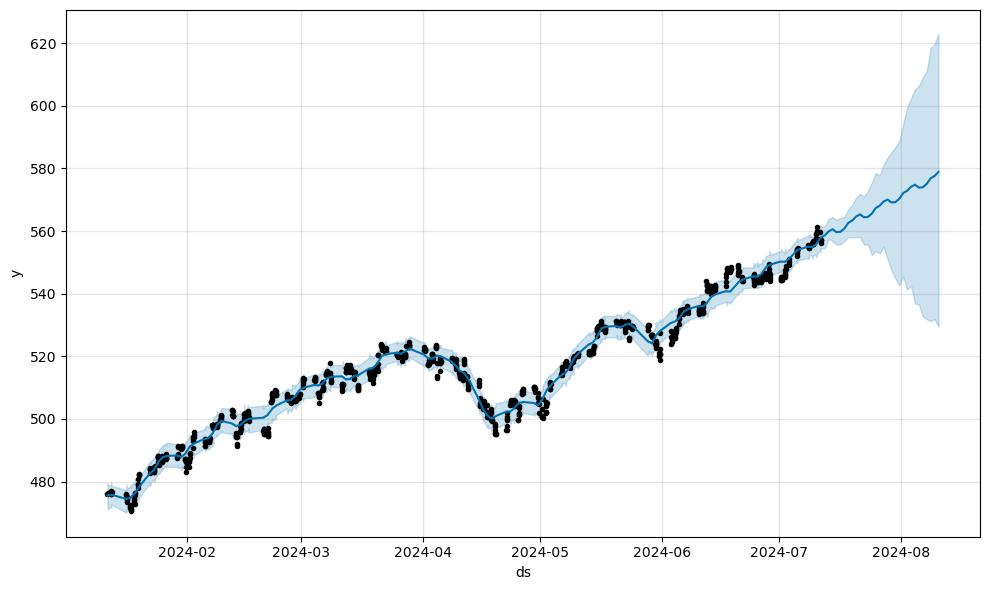

In [38]:
def prophet_forecast(df, future_days):
    # Select only the necessary columns
    df = df[['Datetime', 'Close']]

    # Rename the columns to match Prophet's requirements
    df = df.rename(columns={'Datetime': 'ds', 'Close': 'y'})

    # Ensure the 'ds' column is of datetime type and remove timezone
    df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)

    params = {
               'seasonality_mode': 'additive',
               'changepoint_prior_scale': 0.1728749385978714,
               'seasonality_prior_scale': 6.537473720012282,
               'holidays_prior_scale': 3.6408842037507,
               'uncertainty_samples': 121}

    # Create a Prophet model
    model = Prophet(**params)

    # Fit the model to the data
    model.fit(df)

    # Make a forecast for the next 'future_days' days
    future = model.make_future_dataframe(periods=future_days)

    # Make predictions on the future dataframe
    forecast = model.predict(future)

    # Extract the forecasted close prices
    future_close_prices = forecast['yhat'].values[-future_days:]
    model.plot(forecast)
    return future_close_prices

ticker = 'SPY'
df = get_numeric_data(ticker)
future_close_prices = prophet_forecast(df, future_days = 30)
print("Future close prices:", future_close_prices)



[*********************100%%**********************]  1 of 1 completed
13:25:35 - cmdstanpy - INFO - Chain [1] start processing
13:25:35 - cmdstanpy - INFO - Chain [1] done processing
/Users/aidanlew/miniconda3/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/aidanlew/miniconda3/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Future close prices: [558.6320222  559.92285516 560.59069016 559.66959264 559.77109357
 560.82778777 562.61807396 563.36991522 564.66074818 565.32858319
 564.40748566 564.50898659 565.56568079 567.35596698 568.10780824
 569.3986412  570.06647621 569.14537868 569.24687961 570.30357381
 572.09386    572.84570126 574.13653422 574.80436923 573.8832717
 573.98477263 575.04146683 576.83175302 577.58359428 578.87442724]


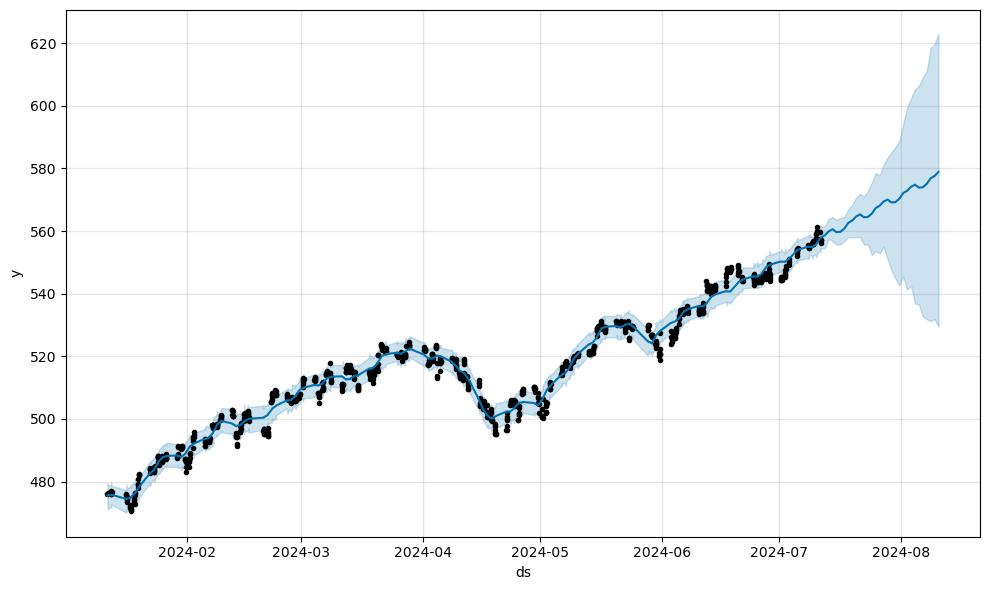

In [38]:
def prophet_forecast(df, future_days):
    # Select only the necessary columns
    df = df[['Datetime', 'Close']]

    # Rename the columns to match Prophet's requirements
    df = df.rename(columns={'Datetime': 'ds', 'Close': 'y'})

    # Ensure the 'ds' column is of datetime type and remove timezone
    df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)

    params = {
               'seasonality_mode': 'additive',
               'changepoint_prior_scale': 0.1728749385978714,
               'seasonality_prior_scale': 6.537473720012282,
               'holidays_prior_scale': 3.6408842037507,
               'uncertainty_samples': 121}

    # Create a Prophet model
    model = Prophet(**params)

    # Fit the model to the data
    model.fit(df)

    # Make a forecast for the next 'future_days' days
    future = model.make_future_dataframe(periods=future_days)

    # Make predictions on the future dataframe
    forecast = model.predict(future)

    # Extract the forecasted close prices
    future_close_prices = forecast['yhat'].values[-future_days:]
    model.plot(forecast)
    return future_close_prices

ticker = 'SPY'
df = get_numeric_data(ticker)
future_close_prices = prophet_forecast(df, future_days = 30)
print("Future close prices:", future_close_prices)



# Only relevent params

See prophet documentation

In [41]:
import optuna
from prophet import Prophet
from prophet.diagnostics import cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import pandas as pd

#get data
ticker = 'SPY'
df = get_numeric_data(ticker)

# Define the study name and store
study_name = 'prophet_optimization_1'
study = optuna.create_study(direction='minimize', study_name=study_name, storage='sqlite:///prophet_optimization_1.db', load_if_exists=True)

# Define the hyperparameter space
def define_hyperparameter_space(trial):
    seasonality_mode = trial.suggest_categorical('seasonality_mode', ['additive', 'multiplicative'])
    changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
    seasonality_prior_scale = trial.suggest_loguniform('seasonality_prior_scale', 1.0, 10.0)
    holidays_prior_scale = trial.suggest_loguniform('holidays_prior_scale', 1.0, 10.0)

    return {
        'seasonality_mode': seasonality_mode,
        'changepoint_prior_scale': changepoint_prior_scale,
        'seasonality_prior_scale': seasonality_prior_scale,
        'holidays_prior_scale': holidays_prior_scale,
    }

# Optuna optimization
def objective(trial):
    hyperparams = define_hyperparameter_space(trial)
    model = Prophet(**hyperparams)
    
    # Prepare the data
    df_selected = df
    
    # Rename the columns to match Prophet's requirements
    df_selected = df.rename(columns={'Datetime': 'ds', 'Close': 'y'})

    # Ensure the 'ds' column is of datetime type and remove timezone
    df_selected['ds'] = pd.to_datetime(df_selected['ds']).dt.tz_localize(None)

    # Fit the model and evaluate the metric
    model.fit(df_selected)
    
    #initial = how much to be trained on, period = when to retrain, horizon = test days for cross validation
    df_cv = cross_validation(model, initial='120 days', period='60 days', horizon='15 days')
    score = mean_absolute_error(df_cv['y'], df_cv['yhat'])  # Use MAE as the score

    return score

# Run the optimization
study.optimize(objective, n_trials=100
              )

# Save the study
#study.save()

# Get the best trial and print the results
best_trial = study.best_trial
print("Best hyperparameters:", best_trial.params)
print("Best score:", best_trial.value)

def send_notification():
    BOT_TOKEN = "7026191163:AAE4CiZV_DLachLeHqz4xAVzDDymqOIKz8Y" ######## Token ##########
    chat_id = "7298484676" ######## Token ##########

    message = f"Done trainig {study.best_params} {best_trial.value}" 

    url = f"https://api.telegram.org/bot{BOT_TOKEN}/sendMessage?chat_id={chat_id}&text={message}"

    requests.get(url).json()

send_notification()

[*********************100%%**********************]  1 of 1 completed
[I 2024-07-11 13:34:02,410] A new study created in RDB with name: prophet_optimization_1
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  seasonality_prior_scale = trial.suggest_loguniform('seasonality_prior_scale', 1.0, 10.0)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:21: Futu

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:02 - cmdstanpy - INFO - Chain [1] start processing
13:34:03 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:03,345] Trial 0 finished with value: 2.36194586744063 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.025226586939933248, 'seasonality_prior_scale': 2.2814635858890493, 'holidays_prior_scale': 6.143407595301928}. Best is trial 0 with value: 2.36194586744063.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:04 - cmdstanpy - INFO - Chain [1] start processing
13:34:05 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:05,155] Trial 1 finished with value: 2.4927325329222185 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.17561748950981146, 'seasonality_prior_scale': 1.241091578468383, 'holidays_prior_scale': 1.1450114113342398}. Best is trial 0 with value: 2.36194586744063.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See ht

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:06 - cmdstanpy - INFO - Chain [1] start processing
13:34:07 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:08,004] Trial 2 finished with value: 2.4717384066553714 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.08482444486605523, 'seasonality_prior_scale': 3.274562623886836, 'holidays_prior_scale': 5.807390906627851}. Best is trial 0 with value: 2.36194586744063.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:09 - cmdstanpy - INFO - Chain [1] start processing
13:34:10 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:10,502] Trial 3 finished with value: 2.477991606850012 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.1082499687372977, 'seasonality_prior_scale': 2.2674907447818673, 'holidays_prior_scale': 3.0336343453476107}. Best is trial 0 with value: 2.36194586744063.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:11 - cmdstanpy - INFO - Chain [1] start processing
13:34:11 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:12,007] Trial 4 finished with value: 2.449930492119482 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.28479449467737694, 'seasonality_prior_scale': 1.7151169532876058, 'holidays_prior_scale': 8.08830613415444}. Best is trial 0 with value: 2.36194586744063.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:13 - cmdstanpy - INFO - Chain [1] start processing
13:34:13 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:13,939] Trial 5 finished with value: 2.5048955514291205 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.32427359303745523, 'seasonality_prior_scale': 5.803721958444738, 'holidays_prior_scale': 3.375036671085439}. Best is trial 0 with value: 2.36194586744063.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:14 - cmdstanpy - INFO - Chain [1] start processing
13:34:14 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:14,955] Trial 6 finished with value: 2.307508189231548 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.04699817167333806, 'seasonality_prior_scale': 7.809946578374507, 'holidays_prior_scale': 1.5072284839577437}. Best is trial 6 with value: 2.307508189231548.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:15 - cmdstanpy - INFO - Chain [1] start processing
13:34:16 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:16,827] Trial 7 finished with value: 2.473882040651929 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.09586522920327212, 'seasonality_prior_scale': 9.431787432424512, 'holidays_prior_scale': 2.553495015063683}. Best is trial 6 with value: 2.307508189231548.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:17 - cmdstanpy - INFO - Chain [1] start processing
13:34:18 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:18,209] Trial 8 finished with value: 2.4649393129006896 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.4225248632607016, 'seasonality_prior_scale': 1.1139261649603238, 'holidays_prior_scale': 5.739072142453811}. Best is trial 6 with value: 2.307508189231548.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:19 - cmdstanpy - INFO - Chain [1] start processing
13:34:19 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:19,722] Trial 9 finished with value: 2.5056827865155027 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.4004988464565181, 'seasonality_prior_scale': 1.4872356636398492, 'holidays_prior_scale': 2.181851465939212}. Best is trial 6 with value: 2.307508189231548.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See ht

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:20 - cmdstanpy - INFO - Chain [1] start processing
13:34:20 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:20,790] Trial 10 finished with value: 2.3207184363051367 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.029041670987146852, 'seasonality_prior_scale': 9.864168667706174, 'holidays_prior_scale': 1.3149595731893136}. Best is trial 6 with value: 2.307508189231548.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:21 - cmdstanpy - INFO - Chain [1] start processing
13:34:21 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:22,001] Trial 11 finished with value: 2.3295058042798438 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.026467684946914625, 'seasonality_prior_scale': 9.620683583577419, 'holidays_prior_scale': 1.0959789412187853}. Best is trial 6 with value: 2.307508189231548.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:22 - cmdstanpy - INFO - Chain [1] start processing
13:34:22 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:22,737] Trial 12 finished with value: 2.8118096326371727 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.010701799235440302, 'seasonality_prior_scale': 5.837523033184322, 'holidays_prior_scale': 1.6659728656434072}. Best is trial 6 with value: 2.307508189231548.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:23 - cmdstanpy - INFO - Chain [1] start processing
13:34:23 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:23,819] Trial 13 finished with value: 2.3012975449594095 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.037129912292810804, 'seasonality_prior_scale': 5.935865308295071, 'holidays_prior_scale': 1.6063645845332624}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:24 - cmdstanpy - INFO - Chain [1] start processing
13:34:24 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:24,757] Trial 14 finished with value: 2.3033819256734414 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.043575909155230096, 'seasonality_prior_scale': 5.647079211016942, 'holidays_prior_scale': 1.739852564011353}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:25 - cmdstanpy - INFO - Chain [1] start processing
13:34:25 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:25,854] Trial 15 finished with value: 2.3124382611638716 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.04924650047956146, 'seasonality_prior_scale': 4.382687170927876, 'holidays_prior_scale': 1.8220356481740088}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:26 - cmdstanpy - INFO - Chain [1] start processing
13:34:26 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:26,529] Trial 16 finished with value: 2.7632813620434873 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.013307438283264852, 'seasonality_prior_scale': 4.30698460751525, 'holidays_prior_scale': 3.9387463254640296}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:27 - cmdstanpy - INFO - Chain [1] start processing
13:34:27 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:27,685] Trial 17 finished with value: 2.3116436521849066 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.05069868619832667, 'seasonality_prior_scale': 6.195252645470699, 'holidays_prior_scale': 2.093118076980142}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:28 - cmdstanpy - INFO - Chain [1] start processing
13:34:28 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:28,497] Trial 18 finished with value: 2.479258480171971 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.019563616263742162, 'seasonality_prior_scale': 3.9675739106797545, 'holidays_prior_scale': 1.0194667875832968}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:29 - cmdstanpy - INFO - Chain [1] start processing
13:34:29 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:29,705] Trial 19 finished with value: 2.4027451038342202 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.13266432123602617, 'seasonality_prior_scale': 7.056201294674167, 'holidays_prior_scale': 1.42322983099617}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:30 - cmdstanpy - INFO - Chain [1] start processing
13:34:30 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:30,902] Trial 20 finished with value: 2.33365224104064 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.06152522916251504, 'seasonality_prior_scale': 5.040144958449964, 'holidays_prior_scale': 2.7535039435260846}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:31 - cmdstanpy - INFO - Chain [1] start processing
13:34:31 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:31,760] Trial 21 finished with value: 2.3071613639570914 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.04160347104501153, 'seasonality_prior_scale': 7.511423482913918, 'holidays_prior_scale': 1.5639007705267258}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:32 - cmdstanpy - INFO - Chain [1] start processing
13:34:32 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:32,880] Trial 22 finished with value: 2.307591307163031 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03225391854785868, 'seasonality_prior_scale': 7.75421904120192, 'holidays_prior_scale': 1.8434198391635859}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:33 - cmdstanpy - INFO - Chain [1] start processing
13:34:33 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:33,924] Trial 23 finished with value: 2.3037843342793747 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03739748170175813, 'seasonality_prior_scale': 3.330367152209348, 'holidays_prior_scale': 2.129636294940276}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:34 - cmdstanpy - INFO - Chain [1] start processing
13:34:34 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:34,788] Trial 24 finished with value: 2.4808001320113076 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.01785898093377263, 'seasonality_prior_scale': 3.212549908814904, 'holidays_prior_scale': 2.3269694809121018}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:35 - cmdstanpy - INFO - Chain [1] start processing
13:34:35 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:35,849] Trial 25 finished with value: 2.303030185958767 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03599271664429086, 'seasonality_prior_scale': 2.6160206173646934, 'holidays_prior_scale': 3.889120649749893}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:36 - cmdstanpy - INFO - Chain [1] start processing
13:34:36 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:37,037] Trial 26 finished with value: 2.3416198708900633 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.06902053954152056, 'seasonality_prior_scale': 2.5007961736209485, 'holidays_prior_scale': 3.422732330816304}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:37 - cmdstanpy - INFO - Chain [1] start processing
13:34:37 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:38,082] Trial 27 finished with value: 2.4589111227842313 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.019687432061246853, 'seasonality_prior_scale': 2.5895731982012338, 'holidays_prior_scale': 4.380733538982287}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:38 - cmdstanpy - INFO - Chain [1] start processing
13:34:39 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:39,177] Trial 28 finished with value: 2.33246320595359 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.058130165659174754, 'seasonality_prior_scale': 1.8030086573052047, 'holidays_prior_scale': 4.774343256682045}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:39 - cmdstanpy - INFO - Chain [1] start processing
13:34:39 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:40,050] Trial 29 finished with value: 2.3019242280106704 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.035036857216529424, 'seasonality_prior_scale': 3.8413365059464137, 'holidays_prior_scale': 8.254807973571145}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:40 - cmdstanpy - INFO - Chain [1] start processing
13:34:40 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:41,020] Trial 30 finished with value: 2.4198338935111696 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.021093225006629433, 'seasonality_prior_scale': 2.7883640266385847, 'holidays_prior_scale': 9.945470696776127}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:41 - cmdstanpy - INFO - Chain [1] start processing
13:34:41 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:42,071] Trial 31 finished with value: 2.3058079672754466 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03368694822169906, 'seasonality_prior_scale': 3.7773447858897007, 'holidays_prior_scale': 7.294301901558888}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:42 - cmdstanpy - INFO - Chain [1] start processing
13:34:42 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:43,039] Trial 32 finished with value: 2.3575252079402413 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.025248246306404553, 'seasonality_prior_scale': 4.746163531777606, 'holidays_prior_scale': 1.251988769885338}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:43 - cmdstanpy - INFO - Chain [1] start processing
13:34:43 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:43,808] Trial 33 finished with value: 2.6729400573356052 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.014835751759958108, 'seasonality_prior_scale': 5.294199278146481, 'holidays_prior_scale': 9.963687981243126}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:44 - cmdstanpy - INFO - Chain [1] start processing
13:34:46 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:46,198] Trial 34 finished with value: 2.477706820344863 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.0820686241117852, 'seasonality_prior_scale': 2.227626736218345, 'holidays_prior_scale': 5.130453094185313}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See h

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:46 - cmdstanpy - INFO - Chain [1] start processing
13:34:46 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:47,062] Trial 35 finished with value: 2.3047742729119807 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.039941753594380146, 'seasonality_prior_scale': 3.5684093898256806, 'holidays_prior_scale': 7.128744872547982}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:48 - cmdstanpy - INFO - Chain [1] start processing
13:34:49 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:49,200] Trial 36 finished with value: 2.483039942655558 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.16105573597544026, 'seasonality_prior_scale': 2.876166358737698, 'holidays_prior_scale': 3.657978629611345}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See 

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:49 - cmdstanpy - INFO - Chain [1] start processing
13:34:50 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:50,146] Trial 37 finished with value: 2.3090692058558506 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.031190579924989942, 'seasonality_prior_scale': 6.837572829210136, 'holidays_prior_scale': 1.8549653767482148}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:51 - cmdstanpy - INFO - Chain [1] start processing
13:34:52 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:52,681] Trial 38 finished with value: 2.4625365809902866 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.066178073359179, 'seasonality_prior_scale': 1.8969952925610958, 'holidays_prior_scale': 2.8229561593570036}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:53 - cmdstanpy - INFO - Chain [1] start processing
13:34:53 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:53,829] Trial 39 finished with value: 2.3606626240522246 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.08574749501896373, 'seasonality_prior_scale': 5.441984409922354, 'holidays_prior_scale': 8.323984593038073}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:55 - cmdstanpy - INFO - Chain [1] start processing
13:34:56 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:56,167] Trial 40 finished with value: 2.385289523577965 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.02283796511434444, 'seasonality_prior_scale': 6.41739155718456, 'holidays_prior_scale': 6.3077045812654395}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See 

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:56 - cmdstanpy - INFO - Chain [1] start processing
13:34:57 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:57,199] Trial 41 finished with value: 2.3018926453820043 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03958428012566193, 'seasonality_prior_scale': 3.3763444735779014, 'holidays_prior_scale': 2.1132878539933344}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:57 - cmdstanpy - INFO - Chain [1] start processing
13:34:58 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:58,236] Trial 42 finished with value: 2.3063282379826564 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.04538101027187046, 'seasonality_prior_scale': 2.129687559597052, 'holidays_prior_scale': 2.44360684431421}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:58 - cmdstanpy - INFO - Chain [1] start processing
13:34:59 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:34:59,339] Trial 43 finished with value: 2.324226484816944 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.05579733630128186, 'seasonality_prior_scale': 4.316459701222887, 'holidays_prior_scale': 1.3182014949023726}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:34:59 - cmdstanpy - INFO - Chain [1] start processing
13:35:00 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:00,294] Trial 44 finished with value: 2.3055984554686 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.036962774571325054, 'seasonality_prior_scale': 1.502171673865607, 'holidays_prior_scale': 3.100528029014522}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:00 - cmdstanpy - INFO - Chain [1] start processing
13:35:01 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:01,233] Trial 45 finished with value: 2.3215526307691645 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.027754363046454202, 'seasonality_prior_scale': 2.963677347074764, 'holidays_prior_scale': 1.638464833611391}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:01 - cmdstanpy - INFO - Chain [1] start processing
13:35:02 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:02,303] Trial 46 finished with value: 2.378011070116701 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.10664038909952596, 'seasonality_prior_scale': 4.713704422403688, 'holidays_prior_scale': 1.8738011302616353}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:02 - cmdstanpy - INFO - Chain [1] start processing
13:35:03 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:03,249] Trial 47 finished with value: 2.303464826149671 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.04613167895536, 'seasonality_prior_scale': 8.270214796256829, 'holidays_prior_scale': 1.4742694508073215}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:04 - cmdstanpy - INFO - Chain [1] start processing
13:35:04 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:04,578] Trial 48 finished with value: 2.348459165765836 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.0776471867994808, 'seasonality_prior_scale': 3.500691621488198, 'holidays_prior_scale': 2.0215678042206005}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:05 - cmdstanpy - INFO - Chain [1] start processing
13:35:06 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:06,957] Trial 49 finished with value: 2.374465250366799 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.015453250262823326, 'seasonality_prior_scale': 3.9898811679367454, 'holidays_prior_scale': 2.679547179700101}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. Se

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:07 - cmdstanpy - INFO - Chain [1] start processing
13:35:07 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:07,893] Trial 50 finished with value: 2.3868641356377585 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.024111551795640195, 'seasonality_prior_scale': 2.4990253846117865, 'holidays_prior_scale': 1.201169904693768}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:08 - cmdstanpy - INFO - Chain [1] start processing
13:35:08 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:08,920] Trial 51 finished with value: 2.30448810252251 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.04683000306018999, 'seasonality_prior_scale': 6.838890187399682, 'holidays_prior_scale': 1.4560017138004102}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:09 - cmdstanpy - INFO - Chain [1] start processing
13:35:09 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:10,073] Trial 52 finished with value: 2.3198442772783725 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.052370463563819636, 'seasonality_prior_scale': 8.661749867344797, 'holidays_prior_scale': 1.7046542635035238}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:10 - cmdstanpy - INFO - Chain [1] start processing
13:35:11 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:11,139] Trial 53 finished with value: 2.3032183590096165 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03452922722362668, 'seasonality_prior_scale': 5.82397348669879, 'holidays_prior_scale': 1.371641959256139}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:11 - cmdstanpy - INFO - Chain [1] start processing
13:35:11 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:12,090] Trial 54 finished with value: 2.304815405056509 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03293645365357004, 'seasonality_prior_scale': 5.878902808763194, 'holidays_prior_scale': 1.1349244912377787}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:12 - cmdstanpy - INFO - Chain [1] start processing
13:35:12 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:12,998] Trial 55 finished with value: 2.365098327102203 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.02741315579773502, 'seasonality_prior_scale': 5.505069710259615, 'holidays_prior_scale': 1.367608506027902}. Best is trial 13 with value: 2.3012975449594095.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:13 - cmdstanpy - INFO - Chain [1] start processing
13:35:14 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:14,112] Trial 56 finished with value: 2.3008957537345456 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03886396475758979, 'seasonality_prior_scale': 4.651936414260297, 'holidays_prior_scale': 1.020648930567761}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:14 - cmdstanpy - INFO - Chain [1] start processing
13:35:15 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:15,553] Trial 57 finished with value: 2.432297579570128 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.24845862096797583, 'seasonality_prior_scale': 4.6955678649288615, 'holidays_prior_scale': 1.0005726795912897}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:16 - cmdstanpy - INFO - Chain [1] start processing
13:35:16 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:16,650] Trial 58 finished with value: 2.306460736370966 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.038044893726088304, 'seasonality_prior_scale': 3.974992608428203, 'holidays_prior_scale': 1.079826357448125}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:17 - cmdstanpy - INFO - Chain [1] start processing
13:35:17 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:17,698] Trial 59 finished with value: 2.331499653963416 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.02941797336066199, 'seasonality_prior_scale': 4.9192675564661865, 'holidays_prior_scale': 1.1966471863410635}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:18 - cmdstanpy - INFO - Chain [1] start processing
13:35:18 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:18,694] Trial 60 finished with value: 2.3058240979577715 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03645032830273473, 'seasonality_prior_scale': 3.1456804799446587, 'holidays_prior_scale': 1.555367815695532}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:19 - cmdstanpy - INFO - Chain [1] start processing
13:35:19 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:19,732] Trial 61 finished with value: 2.30099141679876 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.04249297550041834, 'seasonality_prior_scale': 6.249432406979277, 'holidays_prior_scale': 2.244764459213504}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:20 - cmdstanpy - INFO - Chain [1] start processing
13:35:20 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:20,750] Trial 62 finished with value: 2.3012487256940295 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.0411140442870786, 'seasonality_prior_scale': 6.260882801738649, 'holidays_prior_scale': 2.264211934999219}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:21 - cmdstanpy - INFO - Chain [1] start processing
13:35:21 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:21,854] Trial 63 finished with value: 2.300957064255933 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.04348263408276071, 'seasonality_prior_scale': 6.383952544590588, 'holidays_prior_scale': 2.2981642230756267}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:22 - cmdstanpy - INFO - Chain [1] start processing
13:35:22 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:22,907] Trial 64 finished with value: 2.302772279770614 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.0421923109515501, 'seasonality_prior_scale': 6.358209340006505, 'holidays_prior_scale': 2.2948456788253555}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:23 - cmdstanpy - INFO - Chain [1] start processing
13:35:23 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:23,897] Trial 65 finished with value: 2.3162717951891882 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.05289066244002522, 'seasonality_prior_scale': 7.305507214465751, 'holidays_prior_scale': 2.0143649835737047}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:24 - cmdstanpy - INFO - Chain [1] start processing
13:35:24 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:25,003] Trial 66 finished with value: 2.3226843148602496 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.05877398947605475, 'seasonality_prior_scale': 5.203897423628608, 'holidays_prior_scale': 2.5061672987394923}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:25 - cmdstanpy - INFO - Chain [1] start processing
13:35:25 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:25,998] Trial 67 finished with value: 2.3263464887738707 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.06757947786405986, 'seasonality_prior_scale': 4.396194778169643, 'holidays_prior_scale': 2.337696088129209}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:26 - cmdstanpy - INFO - Chain [1] start processing
13:35:26 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:26,873] Trial 68 finished with value: 2.3173288628658995 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.030425054072224806, 'seasonality_prior_scale': 6.287288954015966, 'holidays_prior_scale': 1.9617968708262061}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:28 - cmdstanpy - INFO - Chain [1] start processing
13:35:29 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:29,344] Trial 69 finished with value: 2.440181654883576 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.04117117204377158, 'seasonality_prior_scale': 8.589457156518007, 'holidays_prior_scale': 2.8837474190739303}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:29 - cmdstanpy - INFO - Chain [1] start processing
13:35:30 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:30,260] Trial 70 finished with value: 2.4082680491201693 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.02215694217457834, 'seasonality_prior_scale': 1.0721370993366068, 'holidays_prior_scale': 2.1768320221817694}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:30 - cmdstanpy - INFO - Chain [1] start processing
13:35:31 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:31,281] Trial 71 finished with value: 2.3050578614607904 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.04184835434006452, 'seasonality_prior_scale': 6.702298461593222, 'holidays_prior_scale': 2.1897168069973465}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:31 - cmdstanpy - INFO - Chain [1] start processing
13:35:32 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:32,249] Trial 72 finished with value: 2.314168615523205 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.05018964748752788, 'seasonality_prior_scale': 6.366605158925194, 'holidays_prior_scale': 2.2950968199054}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:32 - cmdstanpy - INFO - Chain [1] start processing
13:35:33 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:33,296] Trial 73 finished with value: 2.3038402153895534 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.04334915195396477, 'seasonality_prior_scale': 7.902632050000051, 'holidays_prior_scale': 2.6313193116184115}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:33 - cmdstanpy - INFO - Chain [1] start processing
13:35:34 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:34,458] Trial 74 finished with value: 2.3258216776432996 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.06154754158396271, 'seasonality_prior_scale': 5.703790972043198, 'holidays_prior_scale': 3.359281733299866}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:35 - cmdstanpy - INFO - Chain [1] start processing
13:35:35 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:35,355] Trial 75 finished with value: 2.362819217121126 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.02565474577255785, 'seasonality_prior_scale': 6.040363423325261, 'holidays_prior_scale': 2.9501412299230534}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:35 - cmdstanpy - INFO - Chain [1] start processing
13:35:36 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:36,338] Trial 76 finished with value: 2.308464869029859 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.032604320370517824, 'seasonality_prior_scale': 9.211803945334038, 'holidays_prior_scale': 2.455418086238151}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:37 - cmdstanpy - INFO - Chain [1] start processing
13:35:37 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:37,666] Trial 77 finished with value: 2.4573703922534635 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.4894001459763646, 'seasonality_prior_scale': 7.284640254107582, 'holidays_prior_scale': 1.9594630456371163}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:38 - cmdstanpy - INFO - Chain [1] start processing
13:35:38 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:38,635] Trial 78 finished with value: 2.3015358780171553 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.040207078683965926, 'seasonality_prior_scale': 3.6795673912087916, 'holidays_prior_scale': 1.7539179586221183}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See ht

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:39 - cmdstanpy - INFO - Chain [1] start processing
13:35:39 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:39,738] Trial 79 finished with value: 2.3115421116256734 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.04956470536933193, 'seasonality_prior_scale': 3.3199208290909814, 'holidays_prior_scale': 1.7614207805169473}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:41 - cmdstanpy - INFO - Chain [1] start processing
13:35:42 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:42,197] Trial 80 finished with value: 2.4670750548979874 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.0370846743430087, 'seasonality_prior_scale': 3.690370784926501, 'holidays_prior_scale': 1.5849351190109893}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:42 - cmdstanpy - INFO - Chain [1] start processing
13:35:43 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:43,466] Trial 81 finished with value: 2.3012461108829627 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.041205867502605166, 'seasonality_prior_scale': 4.130690831909728, 'holidays_prior_scale': 2.2981228516874888}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:43 - cmdstanpy - INFO - Chain [1] start processing
13:35:44 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:44,489] Trial 82 finished with value: 2.326298844181853 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.028610720421031122, 'seasonality_prior_scale': 4.289310825057363, 'holidays_prior_scale': 2.108623836052117}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:45 - cmdstanpy - INFO - Chain [1] start processing
13:35:45 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:45,908] Trial 83 finished with value: 2.3514844929049703 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.07465546040125356, 'seasonality_prior_scale': 4.133232744421127, 'holidays_prior_scale': 3.259233238116049}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:46 - cmdstanpy - INFO - Chain [1] start processing
13:35:46 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:47,060] Trial 84 finished with value: 2.301065125328531 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03894295346207128, 'seasonality_prior_scale': 3.062087664126645, 'holidays_prior_scale': 1.8288614032557244}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:47 - cmdstanpy - INFO - Chain [1] start processing
13:35:48 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:48,102] Trial 85 finished with value: 2.3154953221675507 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.05518775770891311, 'seasonality_prior_scale': 3.4845610091886354, 'holidays_prior_scale': 1.7647978879844626}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:49 - cmdstanpy - INFO - Chain [1] start processing
13:35:49 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:49,562] Trial 86 finished with value: 2.3058420331674663 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.046889328289380916, 'seasonality_prior_scale': 4.555146361050778, 'holidays_prior_scale': 1.8441393966719162}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:50 - cmdstanpy - INFO - Chain [1] start processing
13:35:50 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:50,569] Trial 87 finished with value: 2.304602764843461 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.039944382336231155, 'seasonality_prior_scale': 3.088161532609896, 'holidays_prior_scale': 1.6770033875484989}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:51 - cmdstanpy - INFO - Chain [1] start processing
13:35:51 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:51,560] Trial 88 finished with value: 2.3278926596988168 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.06446076733492963, 'seasonality_prior_scale': 5.083245222374763, 'holidays_prior_scale': 2.2415476499237275}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:52 - cmdstanpy - INFO - Chain [1] start processing
13:35:52 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:52,511] Trial 89 finished with value: 2.317306313300004 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.030750014312925095, 'seasonality_prior_scale': 2.738158391166428, 'holidays_prior_scale': 2.4202945030556506}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:53 - cmdstanpy - INFO - Chain [1] start processing
13:35:53 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:53,643] Trial 90 finished with value: 2.305253208897978 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.04522517941546136, 'seasonality_prior_scale': 3.770595330654456, 'holidays_prior_scale': 1.9348330115097634}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:54 - cmdstanpy - INFO - Chain [1] start processing
13:35:54 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:54,657] Trial 91 finished with value: 2.3034447196122696 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.035601597709328615, 'seasonality_prior_scale': 3.4203989054834185, 'holidays_prior_scale': 2.0843581598950403}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See ht

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:55 - cmdstanpy - INFO - Chain [1] start processing
13:35:55 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:55,683] Trial 92 finished with value: 2.3025164098721396 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03841342338393081, 'seasonality_prior_scale': 3.6577034648849462, 'holidays_prior_scale': 2.6482979180542645}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:56 - cmdstanpy - INFO - Chain [1] start processing
13:35:56 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:56,517] Trial 93 finished with value: 2.3216463988739604 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03249523244030548, 'seasonality_prior_scale': 2.956994748446728, 'holidays_prior_scale': 1.6291170325117856}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:57 - cmdstanpy - INFO - Chain [1] start processing
13:35:57 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:57,563] Trial 94 finished with value: 2.367224503058706 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.024317244876609547, 'seasonality_prior_scale': 3.923264159959919, 'holidays_prior_scale': 2.0527837742306816}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:58 - cmdstanpy - INFO - Chain [1] start processing
13:35:58 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:58,500] Trial 95 finished with value: 2.3035380053236065 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.034499883954851374, 'seasonality_prior_scale': 5.340300119956993, 'holidays_prior_scale': 2.562267299979507}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:35:59 - cmdstanpy - INFO - Chain [1] start processing
13:35:59 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:35:59,555] Trial 96 finished with value: 2.312475397162588 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.05041869661723718, 'seasonality_prior_scale': 3.2013316512798693, 'holidays_prior_scale': 1.7574773891595912}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:36:01 - cmdstanpy - INFO - Chain [1] start processing
13:36:01 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:36:01,812] Trial 97 finished with value: 2.4265799060535875 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.04011175601080633, 'seasonality_prior_scale': 4.838276802580707, 'holidays_prior_scale': 1.8839545651667238}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. Se

  0%|          | 0/1 [00:00<?, ?it/s]

13:36:02 - cmdstanpy - INFO - Chain [1] start processing
13:36:02 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:36:02,692] Trial 98 finished with value: 2.3657630014435522 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.026850107116952234, 'seasonality_prior_scale': 4.495642523666182, 'holidays_prior_scale': 5.586857353706363}. Best is trial 56 with value: 2.3008957537345456.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3493385774.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:36:03 - cmdstanpy - INFO - Chain [1] start processing
13:36:03 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:36:03,763] Trial 99 finished with value: 2.3230548931447097 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.05674833979151417, 'seasonality_prior_scale': 4.116724161071118, 'holidays_prior_scale': 2.3590731155112765}. Best is trial 56 with value: 2.3008957537345456.


Best hyperparameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03886396475758979, 'seasonality_prior_scale': 4.651936414260297, 'holidays_prior_scale': 1.020648930567761}
Best score: 2.3008957537345456


# Test only the relevent params 100 iters

[*********************100%%**********************]  1 of 1 completed
13:37:23 - cmdstanpy - INFO - Chain [1] start processing
13:37:23 - cmdstanpy - INFO - Chain [1] done processing
/Users/aidanlew/miniconda3/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/aidanlew/miniconda3/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Future close prices: [559.04887816 560.04879384 560.75698348 560.14376297 560.1748742
 561.27432474 563.03870083 563.9176417  564.91755739 565.62574702
 565.01252651 565.04363774 566.14308829 567.90746437 568.78640525
 569.78632093 570.49451057 569.88129006 569.91240129 571.01185183
 572.77622792 573.65516879 574.65508448 575.36327411 574.7500536
 574.78116483 575.88061538 577.64499146 578.52393234 579.52384802]


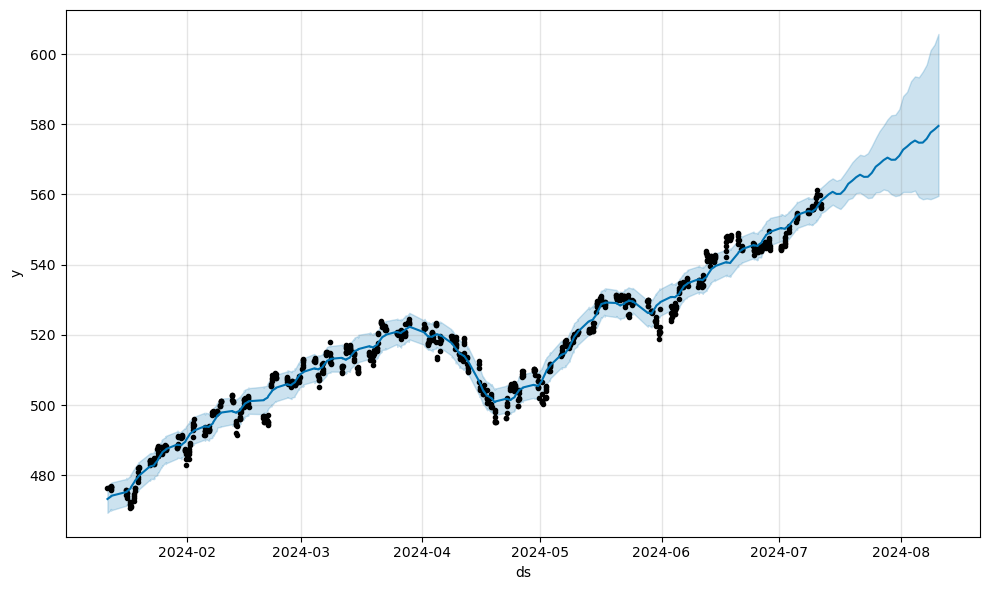

In [42]:
def prophet_forecast(df, future_days):
    # Select only the necessary columns
    df = df[['Datetime', 'Close']]

    # Rename the columns to match Prophet's requirements
    df = df.rename(columns={'Datetime': 'ds', 'Close': 'y'})

    # Ensure the 'ds' column is of datetime type and remove timezone
    df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)

    params = {'seasonality_mode': 'additive',
              'changepoint_prior_scale': 0.03886396475758979,
              'seasonality_prior_scale': 4.651936414260297,
              'holidays_prior_scale': 1.020648930567761
             }

    # Create a Prophet model
    model = Prophet(**params)

    # Fit the model to the data
    model.fit(df)

    # Make a forecast for the next 'future_days' days
    future = model.make_future_dataframe(periods=future_days)

    # Make predictions on the future dataframe
    forecast = model.predict(future)

    # Extract the forecasted close prices
    future_close_prices = forecast['yhat'].values[-future_days:]
    model.plot(forecast)
    return future_close_prices

ticker = 'SPY'
df = get_numeric_data(ticker)
future_close_prices = prophet_forecast(df, future_days = 30)
print("Future close prices:", future_close_prices)


# With MACD, forcast High not Close

## Optimization




In [47]:
import optuna
from prophet import Prophet
from prophet.diagnostics import cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import pandas as pd

#get data
ticker = 'SPY'
df = get_numeric_data(ticker)

# Define the study name and store
study_name = 'prophet_optimization_macd'
study = optuna.create_study(direction='minimize', study_name=study_name, storage='sqlite:///prophet_optimization_macd.db', load_if_exists=True)

# Define the hyperparameter space
def define_hyperparameter_space(trial):
    seasonality_mode = trial.suggest_categorical('seasonality_mode', ['additive', 'multiplicative'])
    changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
    seasonality_prior_scale = trial.suggest_loguniform('seasonality_prior_scale', 1.0, 10.0)
    holidays_prior_scale = trial.suggest_loguniform('holidays_prior_scale', 1.0, 10.0)

    return {
        'seasonality_mode': seasonality_mode,
        'changepoint_prior_scale': changepoint_prior_scale,
        'seasonality_prior_scale': seasonality_prior_scale,
        'holidays_prior_scale': holidays_prior_scale,
    }

# Optuna optimization
def objective(trial):
    hyperparams = define_hyperparameter_space(trial)
    model = Prophet(**hyperparams)
    
    # Prepare the data
    df_selected = df
    
    # Rename the columns to match Prophet's requirements
    df_selected = df.rename(columns={'Datetime': 'ds', 'High': 'y'})

    # Ensure the 'ds' column is of datetime type and remove timezone
    df_selected['ds'] = pd.to_datetime(df_selected['ds']).dt.tz_localize(None)

    # Fit the model and evaluate the metric
    model.fit(df_selected)
    
    #initial = how much to be trained on, period = when to retrain, horizon = test days for cross validation
    df_cv = cross_validation(model, initial='120 days', period='60 days', horizon='15 days')
    score = mean_absolute_error(df_cv['y'], df_cv['yhat'])  # Use MAE as the score

    return score

# Run the optimization
study.optimize(objective, n_trials=100
              )

# Save the study
#study.save()

# Get the best trial and print the results
best_trial = study.best_trial
print("Best hyperparameters:", best_trial.params)
print("Best score:", best_trial.value)

def send_notification():
    BOT_TOKEN = "7026191163:AAE4CiZV_DLachLeHqz4xAVzDDymqOIKz8Y" ######## Token ##########
    chat_id = "7298484676" ######## Token ##########

    message = f"Done trainig {study.best_params} {best_trial.value}" 

    url = f"https://api.telegram.org/bot{BOT_TOKEN}/sendMessage?chat_id={chat_id}&text={message}"

    requests.get(url).json()

send_notification()

[*********************100%%**********************]  1 of 1 completed
[I 2024-07-11 13:49:55,031] A new study created in RDB with name: prophet_optimization_macd
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  seasonality_prior_scale = trial.suggest_loguniform('seasonality_prior_scale', 1.0, 10.0)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:21: F

  0%|          | 0/1 [00:00<?, ?it/s]

13:49:55 - cmdstanpy - INFO - Chain [1] start processing
13:49:56 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:49:56,323] Trial 0 finished with value: 2.4853365760187325 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.3281732936841638, 'seasonality_prior_scale': 6.630307178202367, 'holidays_prior_scale': 4.6331450118170725}. Best is trial 0 with value: 2.4853365760187325.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

  0%|          | 0/1 [00:00<?, ?it/s]

13:49:57 - cmdstanpy - INFO - Chain [1] start processing
13:49:58 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:49:58,255] Trial 1 finished with value: 2.390540338549413 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.02078449375860985, 'seasonality_prior_scale': 9.579615340698078, 'holidays_prior_scale': 1.2017307522316847}. Best is trial 1 with value: 2.390540338549413.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See ht

  0%|          | 0/1 [00:00<?, ?it/s]

13:49:59 - cmdstanpy - INFO - Chain [1] start processing
13:50:00 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:00,567] Trial 2 finished with value: 2.510294089053039 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.1291150395723883, 'seasonality_prior_scale': 3.9531064580809683, 'holidays_prior_scale': 1.1545955018818739}. Best is trial 1 with value: 2.390540338549413.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See ht

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:01 - cmdstanpy - INFO - Chain [1] start processing
13:50:01 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:02,011] Trial 3 finished with value: 2.5344530349301557 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.41775773118334913, 'seasonality_prior_scale': 6.11951337690241, 'holidays_prior_scale': 5.187489779343892}. Best is trial 1 with value: 2.390540338549413.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:03 - cmdstanpy - INFO - Chain [1] start processing
13:50:04 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:04,239] Trial 4 finished with value: 2.4507858507627236 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.04947683164369343, 'seasonality_prior_scale': 2.7777889832241733, 'holidays_prior_scale': 4.397800209235363}. Best is trial 1 with value: 2.390540338549413.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See h

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:05 - cmdstanpy - INFO - Chain [1] start processing
13:50:05 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:05,801] Trial 5 finished with value: 2.3409005535808953 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.013830802309922393, 'seasonality_prior_scale': 8.943829464793389, 'holidays_prior_scale': 8.13841812888498}. Best is trial 5 with value: 2.3409005535808953.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See h

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:06 - cmdstanpy - INFO - Chain [1] start processing
13:50:06 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:06,900] Trial 6 finished with value: 2.377550869607868 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.07300947933570862, 'seasonality_prior_scale': 2.9201890578170984, 'holidays_prior_scale': 4.457632469563173}. Best is trial 5 with value: 2.3409005535808953.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:08 - cmdstanpy - INFO - Chain [1] start processing
13:50:09 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:09,191] Trial 7 finished with value: 2.501205669004783 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.10472562619328885, 'seasonality_prior_scale': 1.8181300100114033, 'holidays_prior_scale': 3.953175737205276}. Best is trial 5 with value: 2.3409005535808953.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See h

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:09 - cmdstanpy - INFO - Chain [1] start processing
13:50:10 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:10,754] Trial 8 finished with value: 2.535563008400619 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.37948933425847725, 'seasonality_prior_scale': 1.263946004825623, 'holidays_prior_scale': 1.0603890020453697}. Best is trial 5 with value: 2.3409005535808953.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See h

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:11 - cmdstanpy - INFO - Chain [1] start processing
13:50:12 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:12,800] Trial 9 finished with value: 2.3707996458531087 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.016261685542904983, 'seasonality_prior_scale': 1.8145060335070515, 'holidays_prior_scale': 1.5058381230679851}. Best is trial 5 with value: 2.3409005535808953.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. Se

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:13 - cmdstanpy - INFO - Chain [1] start processing
13:50:13 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:13,500] Trial 10 finished with value: 2.7683182010671645 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.010059780163938676, 'seasonality_prior_scale': 9.628571785513465, 'holidays_prior_scale': 8.633993039369056}. Best is trial 5 with value: 2.3409005535808953.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:14 - cmdstanpy - INFO - Chain [1] start processing
13:50:15 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:15,330] Trial 11 finished with value: 2.4024075757202743 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.020402540556478933, 'seasonality_prior_scale': 1.0037213427649205, 'holidays_prior_scale': 2.22697316793542}. Best is trial 5 with value: 2.3409005535808953.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:16 - cmdstanpy - INFO - Chain [1] start processing
13:50:16 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:16,335] Trial 12 finished with value: 2.44421764556421 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.010182480833149802, 'seasonality_prior_scale': 1.7317704967657894, 'holidays_prior_scale': 2.2851583581845496}. Best is trial 5 with value: 2.3409005535808953.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:17 - cmdstanpy - INFO - Chain [1] start processing
13:50:18 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:18,348] Trial 13 finished with value: 2.4020222613654543 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.024573030831062263, 'seasonality_prior_scale': 2.181093161628849, 'holidays_prior_scale': 9.959129390108657}. Best is trial 5 with value: 2.3409005535808953.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:18 - cmdstanpy - INFO - Chain [1] start processing
13:50:19 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:19,237] Trial 14 finished with value: 2.29645794160971 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.034421305673914604, 'seasonality_prior_scale': 4.3744295419260375, 'holidays_prior_scale': 1.9001474608027547}. Best is trial 14 with value: 2.29645794160971.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:19 - cmdstanpy - INFO - Chain [1] start processing
13:50:19 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:20,086] Trial 15 finished with value: 2.298315537891209 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.036098767253183776, 'seasonality_prior_scale': 4.559418968661678, 'holidays_prior_scale': 6.918856791347113}. Best is trial 14 with value: 2.29645794160971.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:20 - cmdstanpy - INFO - Chain [1] start processing
13:50:21 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:21,097] Trial 16 finished with value: 2.299714821411788 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03925888902270429, 'seasonality_prior_scale': 4.408818765419851, 'holidays_prior_scale': 2.514734943921786}. Best is trial 14 with value: 2.29645794160971.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:21 - cmdstanpy - INFO - Chain [1] start processing
13:50:22 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:22,125] Trial 17 finished with value: 2.302014652450649 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.035216192989685584, 'seasonality_prior_scale': 5.103523831083276, 'holidays_prior_scale': 6.723578951066637}. Best is trial 14 with value: 2.29645794160971.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:22 - cmdstanpy - INFO - Chain [1] start processing
13:50:23 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:23,356] Trial 18 finished with value: 2.4485419976158274 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.171267673130902, 'seasonality_prior_scale': 3.637639211275058, 'holidays_prior_scale': 1.7529675376906981}. Best is trial 14 with value: 2.29645794160971.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:23 - cmdstanpy - INFO - Chain [1] start processing
13:50:24 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:24,333] Trial 19 finished with value: 2.3696244889660174 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.064809343632533, 'seasonality_prior_scale': 6.5709711451648225, 'holidays_prior_scale': 3.186959229145996}. Best is trial 14 with value: 2.29645794160971.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:24 - cmdstanpy - INFO - Chain [1] start processing
13:50:25 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:25,235] Trial 20 finished with value: 2.2924639814049628 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.033375933821083587, 'seasonality_prior_scale': 4.6047916245325435, 'holidays_prior_scale': 6.054771656554492}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:25 - cmdstanpy - INFO - Chain [1] start processing
13:50:26 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:26,220] Trial 21 finished with value: 2.298577710902867 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03445559946770085, 'seasonality_prior_scale': 5.005055904003983, 'holidays_prior_scale': 6.584266000444191}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:26 - cmdstanpy - INFO - Chain [1] start processing
13:50:27 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:27,127] Trial 22 finished with value: 2.3065331372427504 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.028718042226445188, 'seasonality_prior_scale': 3.064634594859854, 'holidays_prior_scale': 6.292769596634453}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:27 - cmdstanpy - INFO - Chain [1] start processing
13:50:28 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:28,119] Trial 23 finished with value: 2.3412035144097594 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.05201036829573286, 'seasonality_prior_scale': 5.469508164100361, 'holidays_prior_scale': 3.203516323626388}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:28 - cmdstanpy - INFO - Chain [1] start processing
13:50:29 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:29,203] Trial 24 finished with value: 2.3894430723410096 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.08301250681585062, 'seasonality_prior_scale': 3.950842045891074, 'holidays_prior_scale': 1.8031765210244912}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:29 - cmdstanpy - INFO - Chain [1] start processing
13:50:30 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:30,281] Trial 25 finished with value: 2.3170062171685064 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.04683530611473936, 'seasonality_prior_scale': 7.341308518227728, 'holidays_prior_scale': 5.3899425333474325}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:30 - cmdstanpy - INFO - Chain [1] start processing
13:50:31 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:31,199] Trial 26 finished with value: 2.3022311077699005 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.027048752654135273, 'seasonality_prior_scale': 2.4744559962607506, 'holidays_prior_scale': 3.5347068973005493}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See ht

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:31 - cmdstanpy - INFO - Chain [1] start processing
13:50:31 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:31,956] Trial 27 finished with value: 2.617144346646579 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.016317014546509002, 'seasonality_prior_scale': 3.607079431880771, 'holidays_prior_scale': 2.657272012361804}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:32 - cmdstanpy - INFO - Chain [1] start processing
13:50:32 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:32,939] Trial 28 finished with value: 2.3575947188867423 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.05832723033557616, 'seasonality_prior_scale': 4.424151706076005, 'holidays_prior_scale': 7.598047932648162}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:33 - cmdstanpy - INFO - Chain [1] start processing
13:50:34 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:34,254] Trial 29 finished with value: 2.4654645713698295 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.22425204565196669, 'seasonality_prior_scale': 7.621688873005377, 'holidays_prior_scale': 5.633524077403741}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:34 - cmdstanpy - INFO - Chain [1] start processing
13:50:35 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:35,383] Trial 30 finished with value: 2.3964089291480137 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.09698529041425265, 'seasonality_prior_scale': 4.628073444633345, 'holidays_prior_scale': 9.874662726649353}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:35 - cmdstanpy - INFO - Chain [1] start processing
13:50:36 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:36,313] Trial 31 finished with value: 2.3017024107083563 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03601810126859657, 'seasonality_prior_scale': 5.455353361278899, 'holidays_prior_scale': 6.831013711997743}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:36 - cmdstanpy - INFO - Chain [1] start processing
13:50:37 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:37,200] Trial 32 finished with value: 2.2936907745106407 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03044892382011285, 'seasonality_prior_scale': 5.8581623726347845, 'holidays_prior_scale': 6.021712653481417}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:37 - cmdstanpy - INFO - Chain [1] start processing
13:50:38 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:38,233] Trial 33 finished with value: 2.377202302676625 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.022099988744892964, 'seasonality_prior_scale': 6.020067836538358, 'holidays_prior_scale': 4.98207813879602}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:38 - cmdstanpy - INFO - Chain [1] start processing
13:50:39 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:39,144] Trial 34 finished with value: 2.2943439245313693 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.030958718260747455, 'seasonality_prior_scale': 3.477479505655018, 'holidays_prior_scale': 1.4275387624288725}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:39 - cmdstanpy - INFO - Chain [1] start processing
13:50:39 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:40,065] Trial 35 finished with value: 2.306523215247799 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.04307558453675113, 'seasonality_prior_scale': 3.530792391126544, 'holidays_prior_scale': 1.321917192872352}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:40 - cmdstanpy - INFO - Chain [1] start processing
13:50:40 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:40,999] Trial 36 finished with value: 2.3191355944305614 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.028283038474794582, 'seasonality_prior_scale': 7.848785484213339, 'holidays_prior_scale': 1.3508025378825663}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:41 - cmdstanpy - INFO - Chain [1] start processing
13:50:41 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:41,802] Trial 37 finished with value: 2.4045554195320284 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.01959323115953522, 'seasonality_prior_scale': 2.628735764760825, 'holidays_prior_scale': 1.8028003235265628}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:42 - cmdstanpy - INFO - Chain [1] start processing
13:50:42 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:42,594] Trial 38 finished with value: 2.525931946412031 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.016862431785097835, 'seasonality_prior_scale': 3.970293265782484, 'holidays_prior_scale': 1.0198298572071325}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:43 - cmdstanpy - INFO - Chain [1] start processing
13:50:43 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:43,242] Trial 39 finished with value: 2.7146764796340443 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.012594354039134484, 'seasonality_prior_scale': 5.911353834810695, 'holidays_prior_scale': 4.146257765616833}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:43 - cmdstanpy - INFO - Chain [1] start processing
13:50:44 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:44,231] Trial 40 finished with value: 2.359904998254983 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.05614715623521051, 'seasonality_prior_scale': 3.434080158757182, 'holidays_prior_scale': 2.0239719095586324}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:44 - cmdstanpy - INFO - Chain [1] start processing
13:50:45 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:45,163] Trial 41 finished with value: 2.30326770696255 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.028705660580223624, 'seasonality_prior_scale': 4.138902990194373, 'holidays_prior_scale': 1.5107291264931517}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:45 - cmdstanpy - INFO - Chain [1] start processing
13:50:46 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:46,145] Trial 42 finished with value: 2.2931310208239 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.034797480600631356, 'seasonality_prior_scale': 4.808626331298119, 'holidays_prior_scale': 5.777334199292333}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:46 - cmdstanpy - INFO - Chain [1] start processing
13:50:46 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:47,000] Trial 43 finished with value: 2.3226894797858844 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.04534859061367286, 'seasonality_prior_scale': 6.6931611738671215, 'holidays_prior_scale': 4.919936319839793}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:47 - cmdstanpy - INFO - Chain [1] start processing
13:50:47 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:48,063] Trial 44 finished with value: 2.3794747702887626 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.07162638583615422, 'seasonality_prior_scale': 5.07234468269184, 'holidays_prior_scale': 5.962340291417886}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:48 - cmdstanpy - INFO - Chain [1] start processing
13:50:48 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:49,053] Trial 45 finished with value: 2.3199785904712162 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.02381358457998377, 'seasonality_prior_scale': 3.112613393768365, 'holidays_prior_scale': 7.516802297898633}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:49 - cmdstanpy - INFO - Chain [1] start processing
13:50:50 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:50,385] Trial 46 finished with value: 2.391534711868422 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.0308473073691447, 'seasonality_prior_scale': 8.268428523324891, 'holidays_prior_scale': 3.6436567317070288}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See 

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:50 - cmdstanpy - INFO - Chain [1] start processing
13:50:51 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:51,287] Trial 47 finished with value: 2.3025449676999523 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.04163555758346374, 'seasonality_prior_scale': 2.304169917975661, 'holidays_prior_scale': 1.1728414293415363}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:52 - cmdstanpy - INFO - Chain [1] start processing
13:50:53 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:53,449] Trial 48 finished with value: 2.381028022735758 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.018748130760934133, 'seasonality_prior_scale': 6.5729549374912555, 'holidays_prior_scale': 8.53618056459526}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:53 - cmdstanpy - INFO - Chain [1] start processing
13:50:54 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:54,104] Trial 49 finished with value: 2.6552063877347294 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.013622942816544146, 'seasonality_prior_scale': 3.308945504409129, 'holidays_prior_scale': 1.6287211682305371}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:54 - cmdstanpy - INFO - Chain [1] start processing
13:50:55 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:55,088] Trial 50 finished with value: 2.2926702361131572 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.031914001257204755, 'seasonality_prior_scale': 2.824426621041453, 'holidays_prior_scale': 4.44983118549791}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:55 - cmdstanpy - INFO - Chain [1] start processing
13:50:55 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:55,948] Trial 51 finished with value: 2.3379168980546123 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.02399744488299571, 'seasonality_prior_scale': 2.7402459032272333, 'holidays_prior_scale': 4.654004868261931}. Best is trial 20 with value: 2.2924639814049628.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:56 - cmdstanpy - INFO - Chain [1] start processing
13:50:56 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:56,916] Trial 52 finished with value: 2.291867758290895 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03132627808654428, 'seasonality_prior_scale': 2.0402731368344673, 'holidays_prior_scale': 5.869231482077217}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:57 - cmdstanpy - INFO - Chain [1] start processing
13:50:57 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:57,943] Trial 53 finished with value: 2.3093495032317892 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.04001416735231944, 'seasonality_prior_scale': 1.981508962879428, 'holidays_prior_scale': 5.790483557980111}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:58 - cmdstanpy - INFO - Chain [1] start processing
13:50:59 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:50:59,135] Trial 54 finished with value: 2.5244643551113493 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.4911257284752003, 'seasonality_prior_scale': 1.6222123609485584, 'holidays_prior_scale': 4.303177482669334}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:50:59 - cmdstanpy - INFO - Chain [1] start processing
13:50:59 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:00,061] Trial 55 finished with value: 2.2953435411951935 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03349991324923969, 'seasonality_prior_scale': 1.2985372252396639, 'holidays_prior_scale': 3.836698537405989}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:01 - cmdstanpy - INFO - Chain [1] start processing
13:51:02 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:02,532] Trial 56 finished with value: 2.4288889346715234 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.026700710860941678, 'seasonality_prior_scale': 1.5629648243333818, 'holidays_prior_scale': 5.2868549524228925}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. S

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:03 - cmdstanpy - INFO - Chain [1] start processing
13:51:03 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:03,518] Trial 57 finished with value: 2.3267656161055075 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.04894319100363603, 'seasonality_prior_scale': 2.051105758834089, 'holidays_prior_scale': 6.2808857963380955}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:04 - cmdstanpy - INFO - Chain [1] start processing
13:51:04 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:04,537] Trial 58 finished with value: 2.3533948486075498 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.058574056957244984, 'seasonality_prior_scale': 2.374562575674082, 'holidays_prior_scale': 7.460430416120165}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:05 - cmdstanpy - INFO - Chain [1] start processing
13:51:05 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:05,333] Trial 59 finished with value: 2.305328497255935 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03164248023056719, 'seasonality_prior_scale': 2.9121306467731887, 'holidays_prior_scale': 4.555098085527499}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:05 - cmdstanpy - INFO - Chain [1] start processing
13:51:06 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:06,168] Trial 60 finished with value: 2.36822499646023 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.020856328112403278, 'seasonality_prior_scale': 3.731391325644776, 'holidays_prior_scale': 6.069488454690084}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:06 - cmdstanpy - INFO - Chain [1] start processing
13:51:07 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:07,112] Trial 61 finished with value: 2.2937488143538673 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.0328267322931534, 'seasonality_prior_scale': 1.2739751231132843, 'holidays_prior_scale': 3.840880947222542}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:07 - cmdstanpy - INFO - Chain [1] start processing
13:51:07 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:08,026] Trial 62 finished with value: 2.3125121751532807 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.038030356914506375, 'seasonality_prior_scale': 1.1891786213481053, 'holidays_prior_scale': 2.6827188943397218}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:08 - cmdstanpy - INFO - Chain [1] start processing
13:51:08 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:08,855] Trial 63 finished with value: 2.3308434521938777 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.025639701963339544, 'seasonality_prior_scale': 1.1975696031727714, 'holidays_prior_scale': 4.784790118816871}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:09 - cmdstanpy - INFO - Chain [1] start processing
13:51:09 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:09,727] Trial 64 finished with value: 2.293386167493352 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.02981240265902, 'seasonality_prior_scale': 1.048453419999816, 'holidays_prior_scale': 5.3420605099262115}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:10 - cmdstanpy - INFO - Chain [1] start processing
13:51:10 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:10,710] Trial 65 finished with value: 2.357909744274826 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.022819162041178346, 'seasonality_prior_scale': 1.346180989597175, 'holidays_prior_scale': 5.582266237379447}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:11 - cmdstanpy - INFO - Chain [1] start processing
13:51:12 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:12,269] Trial 66 finished with value: 2.3688133879785225 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.01868145182566333, 'seasonality_prior_scale': 1.0470577444749305, 'holidays_prior_scale': 5.19566302434606}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See 

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:12 - cmdstanpy - INFO - Chain [1] start processing
13:51:13 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:13,294] Trial 67 finished with value: 2.36278506687683 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.05295380068815255, 'seasonality_prior_scale': 1.1138974399519073, 'holidays_prior_scale': 4.0508310175980515}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:13 - cmdstanpy - INFO - Chain [1] start processing
13:51:14 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:14,258] Trial 68 finished with value: 2.300847831655095 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.037324294300285214, 'seasonality_prior_scale': 1.421280794109901, 'holidays_prior_scale': 7.206450864839703}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:14 - cmdstanpy - INFO - Chain [1] start processing
13:51:15 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:15,377] Trial 69 finished with value: 2.313324887798193 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.04454329981112314, 'seasonality_prior_scale': 1.4381558363056017, 'holidays_prior_scale': 3.408041880670235}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:15 - cmdstanpy - INFO - Chain [1] start processing
13:51:16 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:16,336] Trial 70 finished with value: 2.3580442413087703 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.06622242336614238, 'seasonality_prior_scale': 4.843372517861343, 'holidays_prior_scale': 8.052831057937851}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:16 - cmdstanpy - INFO - Chain [1] start processing
13:51:17 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:17,232] Trial 71 finished with value: 2.2930862371627834 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03186590047008412, 'seasonality_prior_scale': 5.480597347072512, 'holidays_prior_scale': 6.506325581740065}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:17 - cmdstanpy - INFO - Chain [1] start processing
13:51:17 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:18,060] Trial 72 finished with value: 2.293749447245339 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03149157757618231, 'seasonality_prior_scale': 5.2891583701425935, 'holidays_prior_scale': 6.40561766399651}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:18 - cmdstanpy - INFO - Chain [1] start processing
13:51:18 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:19,000] Trial 73 finished with value: 2.3052085261523314 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.026357876836852326, 'seasonality_prior_scale': 5.570401282897718, 'holidays_prior_scale': 5.5147758734316055}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:19 - cmdstanpy - INFO - Chain [1] start processing
13:51:20 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:20,231] Trial 74 finished with value: 2.4429095144605872 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.14329765137301778, 'seasonality_prior_scale': 1.016637733952431, 'holidays_prior_scale': 6.850852212465554}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:20 - cmdstanpy - INFO - Chain [1] start processing
13:51:21 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:21,102] Trial 75 finished with value: 2.292488257214278 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03392524162924187, 'seasonality_prior_scale': 5.848199780556808, 'holidays_prior_scale': 4.357836505142774}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:21 - cmdstanpy - INFO - Chain [1] start processing
13:51:21 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:22,020] Trial 76 finished with value: 2.303356975620626 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.029208383959118834, 'seasonality_prior_scale': 6.846758598535633, 'holidays_prior_scale': 5.126053800834563}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:22 - cmdstanpy - INFO - Chain [1] start processing
13:51:22 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:23,028] Trial 77 finished with value: 2.301490073921476 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03613720919066571, 'seasonality_prior_scale': 5.781308500494188, 'holidays_prior_scale': 4.4088446425034}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:23 - cmdstanpy - INFO - Chain [1] start processing
13:51:23 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:23,832] Trial 78 finished with value: 2.3839512557913203 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.02142927825401081, 'seasonality_prior_scale': 4.703503598586985, 'holidays_prior_scale': 6.065233794737433}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:24 - cmdstanpy - INFO - Chain [1] start processing
13:51:25 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:25,215] Trial 79 finished with value: 2.466055113620533 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.26238988599064295, 'seasonality_prior_scale': 6.160602684804155, 'holidays_prior_scale': 6.560151169326297}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:26 - cmdstanpy - INFO - Chain [1] start processing
13:51:27 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:27,633] Trial 80 finished with value: 2.463949254683879 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.04084387317544276, 'seasonality_prior_scale': 4.093708900037722, 'holidays_prior_scale': 4.86589372880633}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See ht

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:28 - cmdstanpy - INFO - Chain [1] start processing
13:51:28 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:28,679] Trial 81 finished with value: 2.2924958121770493 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03333906848582006, 'seasonality_prior_scale': 1.8175788311630559, 'holidays_prior_scale': 4.2238447021868355}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:29 - cmdstanpy - INFO - Chain [1] start processing
13:51:29 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:29,716] Trial 82 finished with value: 2.293518388307928 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03486429122778574, 'seasonality_prior_scale': 6.1711346212376395, 'holidays_prior_scale': 2.9736093407618314}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:30 - cmdstanpy - INFO - Chain [1] start processing
13:51:30 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:30,648] Trial 83 finished with value: 2.2983355609149876 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.034541917793329734, 'seasonality_prior_scale': 1.7724181945616642, 'holidays_prior_scale': 2.954353537151034}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:31 - cmdstanpy - INFO - Chain [1] start processing
13:51:31 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:31,584] Trial 84 finished with value: 2.3140260681263127 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.047455965915423726, 'seasonality_prior_scale': 1.9349475259760773, 'holidays_prior_scale': 3.321468789553927}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:32 - cmdstanpy - INFO - Chain [1] start processing
13:51:32 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:32,697] Trial 85 finished with value: 2.3869354578032764 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.08139054017920078, 'seasonality_prior_scale': 7.210968255243809, 'holidays_prior_scale': 3.016354780528858}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:33 - cmdstanpy - INFO - Chain [1] start processing
13:51:33 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:33,633] Trial 86 finished with value: 2.3264840242628835 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.024983552341990106, 'seasonality_prior_scale': 6.418575295850481, 'holidays_prior_scale': 2.391358391124088}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:34 - cmdstanpy - INFO - Chain [1] start processing
13:51:34 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:34,601] Trial 87 finished with value: 2.3019289258399525 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.039887761537176006, 'seasonality_prior_scale': 9.940450740691219, 'holidays_prior_scale': 4.263201697297109}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:35 - cmdstanpy - INFO - Chain [1] start processing
13:51:35 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:35,484] Trial 88 finished with value: 2.297583112647129 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.027291586161422993, 'seasonality_prior_scale': 8.624418446630408, 'holidays_prior_scale': 5.354891311005044}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:36 - cmdstanpy - INFO - Chain [1] start processing
13:51:36 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:36,392] Trial 89 finished with value: 2.309211122385391 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.042641192460362375, 'seasonality_prior_scale': 5.604622499703658, 'holidays_prior_scale': 3.6634943657890005}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:36 - cmdstanpy - INFO - Chain [1] start processing
13:51:37 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:37,161] Trial 90 finished with value: 2.2963875866029633 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.029114945102958787, 'seasonality_prior_scale': 2.5333030403250634, 'holidays_prior_scale': 5.814934466578369}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:37 - cmdstanpy - INFO - Chain [1] start processing
13:51:37 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:38,036] Trial 91 finished with value: 2.293811087403066 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03366210431584953, 'seasonality_prior_scale': 5.247468620791726, 'holidays_prior_scale': 7.117586136623167}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:38 - cmdstanpy - INFO - Chain [1] start processing
13:51:38 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:38,834] Trial 92 finished with value: 2.308472141532255 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.030186811894646056, 'seasonality_prior_scale': 2.1268664243502196, 'holidays_prior_scale': 4.617586055880002}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:39 - cmdstanpy - INFO - Chain [1] start processing
13:51:39 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:39,685] Trial 93 finished with value: 2.297724385701196 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.035849167655085404, 'seasonality_prior_scale': 6.007612567509206, 'holidays_prior_scale': 5.053737509467539}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:40 - cmdstanpy - INFO - Chain [1] start processing
13:51:40 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:40,571] Trial 94 finished with value: 2.3781224423761422 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.022303567807533387, 'seasonality_prior_scale': 4.872280078668911, 'holidays_prior_scale': 6.163251344596023}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:41 - cmdstanpy - INFO - Chain [1] start processing
13:51:41 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:41,545] Trial 95 finished with value: 2.315406348022963 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.05137977329403302, 'seasonality_prior_scale': 4.371414609982738, 'holidays_prior_scale': 5.662093875875858}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:/

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:41 - cmdstanpy - INFO - Chain [1] start processing
13:51:42 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:42,355] Trial 96 finished with value: 2.4990908552857665 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.01697156758676126, 'seasonality_prior_scale': 7.0456531827236, 'holidays_prior_scale': 8.010765063459997}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:43 - cmdstanpy - INFO - Chain [1] start processing
13:51:44 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:44,923] Trial 97 finished with value: 2.4249217870589685 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.024381158713644383, 'seasonality_prior_scale': 6.25577326876034, 'holidays_prior_scale': 9.189736869469856}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See 

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:45 - cmdstanpy - INFO - Chain [1] start processing
13:51:45 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:45,889] Trial 98 finished with value: 2.3064664644297803 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03832911522144504, 'seasonality_prior_scale': 3.267439471196181, 'holidays_prior_scale': 2.7402630674105137}. Best is trial 52 with value: 2.291867758290895.
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.5)
/var/folders/jp/6l9fcsfs0dq5_695_52tn60r0000gn/T/ipykernel_9762/3529039921.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

  0%|          | 0/1 [00:00<?, ?it/s]

13:51:46 - cmdstanpy - INFO - Chain [1] start processing
13:51:46 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-11 13:51:46,919] Trial 99 finished with value: 2.297184041118347 and parameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.02816865856886273, 'seasonality_prior_scale': 1.673092558552986, 'holidays_prior_scale': 3.9494857264099976}. Best is trial 52 with value: 2.291867758290895.


Best hyperparameters: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03132627808654428, 'seasonality_prior_scale': 2.0402731368344673, 'holidays_prior_scale': 5.869231482077217}
Best score: 2.291867758290895


## Test w/ MACD & forcast high

[*********************100%%**********************]  1 of 1 completed
14:25:50 - cmdstanpy - INFO - Chain [1] start processing
14:25:51 - cmdstanpy - INFO - Chain [1] done processing
/Users/aidanlew/miniconda3/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


Future high prices: [559.71188918 559.67770175 560.34446646 560.84065659 560.72079516
 561.96508146 563.73176759 564.62446516 564.59027774 565.25704245
 565.75323257 565.63337115 566.87765745 568.64434358 569.53704115
 569.50285373 570.16961844 570.66580856 570.54594714 571.79023344
 573.55691957 574.44961714 574.41542971 575.08219442 575.57838455
 575.45852313 576.70280943 578.46949555 579.36219313 579.3280057 ]


/Users/aidanlew/miniconda3/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


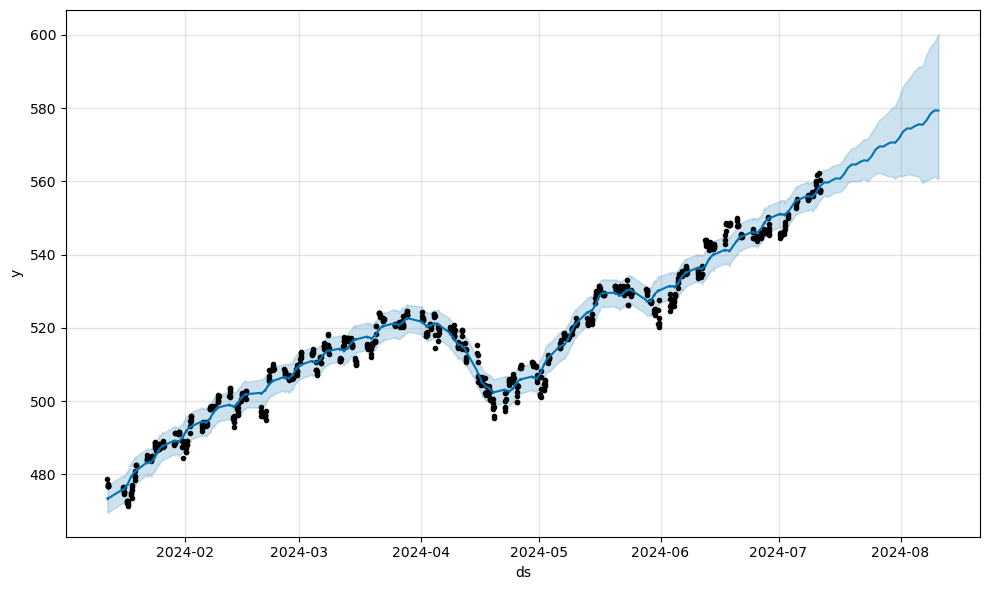

In [56]:
def prophet_forecast(df, future_days):
    # Select only the necessary columns
    df = df[['Datetime', 'High']]

    # Rename the columns to match Prophet's requirements
    df = df.rename(columns={'Datetime': 'ds', 'High': 'y'})

    # Ensure the 'ds' column is of datetime type and remove timezone
    df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)

    params = {'seasonality_mode': 'additive',
              'changepoint_prior_scale': 0.03132627808654428,
              'seasonality_prior_scale': 2.0402731368344673,
              'holidays_prior_scale': 5.869231482077217
             }

    # Create a Prophet model
    model = Prophet(**params)

    # Fit the model to the data
    model.fit(df)

    # Make a forecast for the next 'future_days' days
    future = model.make_future_dataframe(periods=future_days)

    # Make predictions on the future dataframe
    forecast = model.predict(future)

    # Extract the forecasted close prices
    future_close_prices = forecast['yhat'].values[-future_days:]
    model.plot(forecast)
    return future_close_prices

ticker = 'SPY'

df = get_numeric_data(ticker)
future_close_prices = prophet_forecast(df, future_days = 30
                                      )
print("Future high prices:", future_close_prices)


[*********************100%%**********************]  1 of 1 completed
13:56:25 - cmdstanpy - INFO - Chain [1] start processing
13:56:26 - cmdstanpy - INFO - Chain [1] done processing
/Users/aidanlew/miniconda3/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/aidanlew/miniconda3/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Future high prices: [230.30261335 229.75406275 231.12137096 232.74653817 233.1163997
 234.37338544 235.01141067 236.22917553 235.68062493 237.04793314
 238.67310035 239.04296188 240.29994762 240.93797285 242.15573771
 241.60718711 242.97449532 244.59966253 244.96952406 246.2265098
 246.86453503 248.08229989 247.53374929 248.9010575  250.52622471
 250.89608624 252.15307199 252.79109721 254.00886207 253.46031148
 254.82761968 256.45278689 256.82264842 258.07963417 258.71765939
 259.93542425 259.38687366 260.75418186 262.37934907 262.7492106
 264.00619635 264.64422157 265.86198643 265.31343584 266.68074405
 268.30591125 268.67577278 269.93275853 270.57078375 271.78854861
 271.23999802 272.60730623 274.23247343 274.60233496 275.85932071
 276.49734593 277.71511079 277.1665602  278.53386841 280.15903562]


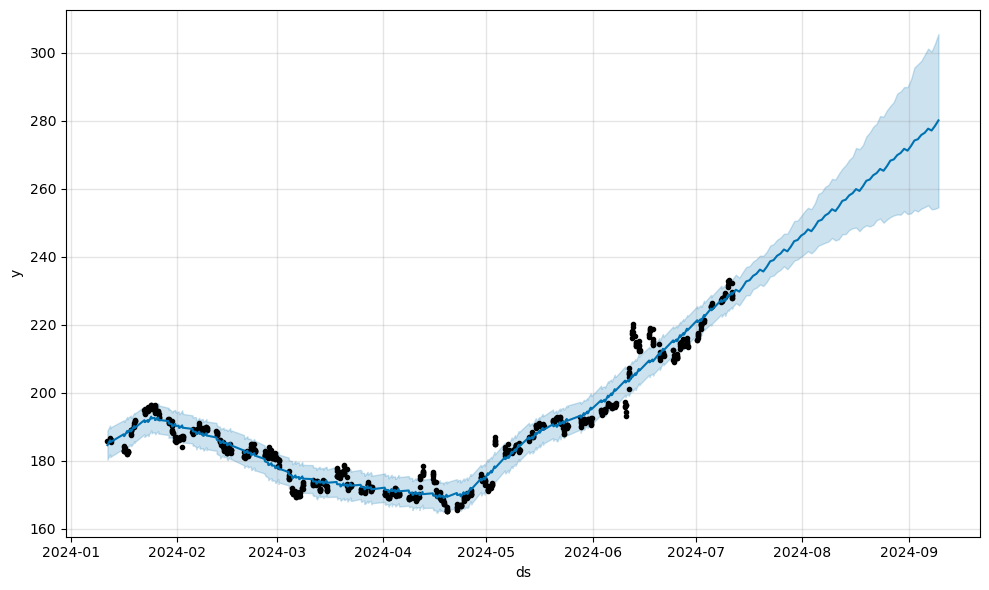

In [55]:
ticker = 'AAPL'
df = get_numeric_data(ticker)
future_close_prices = prophet_forecast(df, future_days = 30
                                      )
print("Future high prices:", future_close_prices)